# *EDA In Depth*
*On this chapter ,we will use R-Programming Language in order to conduct descreptive and inferential analysis to analys the data as much as we can to help descion making*

---
---

*A. Install needed libraries*

In [30]:
library(tidyverse)
library(janitor)
library(ggplot2)
library(patchwork)
library(mosaic)
library(skimr)
library(GGally)
library(dlookr)
library(rstatix)
library(ggstatsplot)
library(effectsize)
library(gmodels)
library(FSA)
library(ISLR)
library(repr)
options(repr.plot.width=25, repr.plot.height=7);

---
---

*B. Data Set*

In [31]:
df<- read.csv("data_set_for_stats.csv")

In [32]:
df  %>% head()

date       landaveragetemperature landaveragetemperatureuncertainty
1 1850-01-01  0.749                 1.105                            
2 1850-02-01  3.071                 1.275                            
3 1850-03-01  4.954                 0.955                            
4 1850-04-01  7.217                 0.665                            
5 1850-05-01 10.004                 0.617                            
6 1850-06-01 13.150                 0.614                            
  landmaxtemperature landmaxtemperatureuncertainty landmintemperature
1  8.242             1.738                         -3.206            
2  9.970             3.007                         -2.291            
3 10.347             2.401                         -1.905            
4 12.934             1.004                          1.018            
5 15.655             2.406                          3.811            
6 18.946             2.817                          7.106            
  landmintemperatureuncertainty landandoceanaveragetemperature
1 2.822                         12.833                        
2 1.623                         13.588                        
3 1.410                         14.043                        
4 1.329                         14.667                        
5 1.347                         15.507                        
6 0.857                         16.353                        
  landandoceanaveragetemperatureuncertainty
1 0.367                                    
2 0.414                                    
3 0.341                                    
4 0.267                                    
5 0.249                                    
6 0.245

---

*B.1. Na Values*

In [83]:

df  %>% is.na() %>% sum()

[1] 0

---

*B.2. data types*

In [84]:
df %>% glimpse()

Rows: 1,992
Columns: 9
$ date                                      <date> 1850-01-01, 1850-02-01, 185…
$ landaveragetemperature                    <dbl> 0.749, 3.071, 4.954, 7.217, …
$ landaveragetemperatureuncertainty         <dbl> 1.105, 1.275, 0.955, 0.665, …
$ landmaxtemperature                        <dbl> 8.242, 9.970, 10.347, 12.934…
$ landmaxtemperatureuncertainty             <dbl> 1.738, 3.007, 2.401, 1.004, …
$ landmintemperature                        <dbl> -3.206, -2.291, -1.905, 1.01…
$ landmintemperatureuncertainty             <dbl> 2.822, 1.623, 1.410, 1.329, …
$ landandoceanaveragetemperature            <dbl> 12.833, 13.588, 14.043, 14.6…
$ landandoceanaveragetemperatureuncertainty <dbl> 0.367, 0.414, 0.341, 0.267, …


---

*B.3. converting (date) to date factor*

In [86]:
df$date<-as.Date.factor(df$date);

* *Confirm our changings*

In [87]:
df %>% glimpse()

Rows: 1,992
Columns: 9
$ date                                      <date> 1850-01-01, 1850-02-01, 185…
$ landaveragetemperature                    <dbl> 0.749, 3.071, 4.954, 7.217, …
$ landaveragetemperatureuncertainty         <dbl> 1.105, 1.275, 0.955, 0.665, …
$ landmaxtemperature                        <dbl> 8.242, 9.970, 10.347, 12.934…
$ landmaxtemperatureuncertainty             <dbl> 1.738, 3.007, 2.401, 1.004, …
$ landmintemperature                        <dbl> -3.206, -2.291, -1.905, 1.01…
$ landmintemperatureuncertainty             <dbl> 2.822, 1.623, 1.410, 1.329, …
$ landandoceanaveragetemperature            <dbl> 12.833, 13.588, 14.043, 14.6…
$ landandoceanaveragetemperatureuncertainty <dbl> 0.367, 0.414, 0.341, 0.267, …


---
---

*C. Analysis*

*C.1. Quick Data Summary*

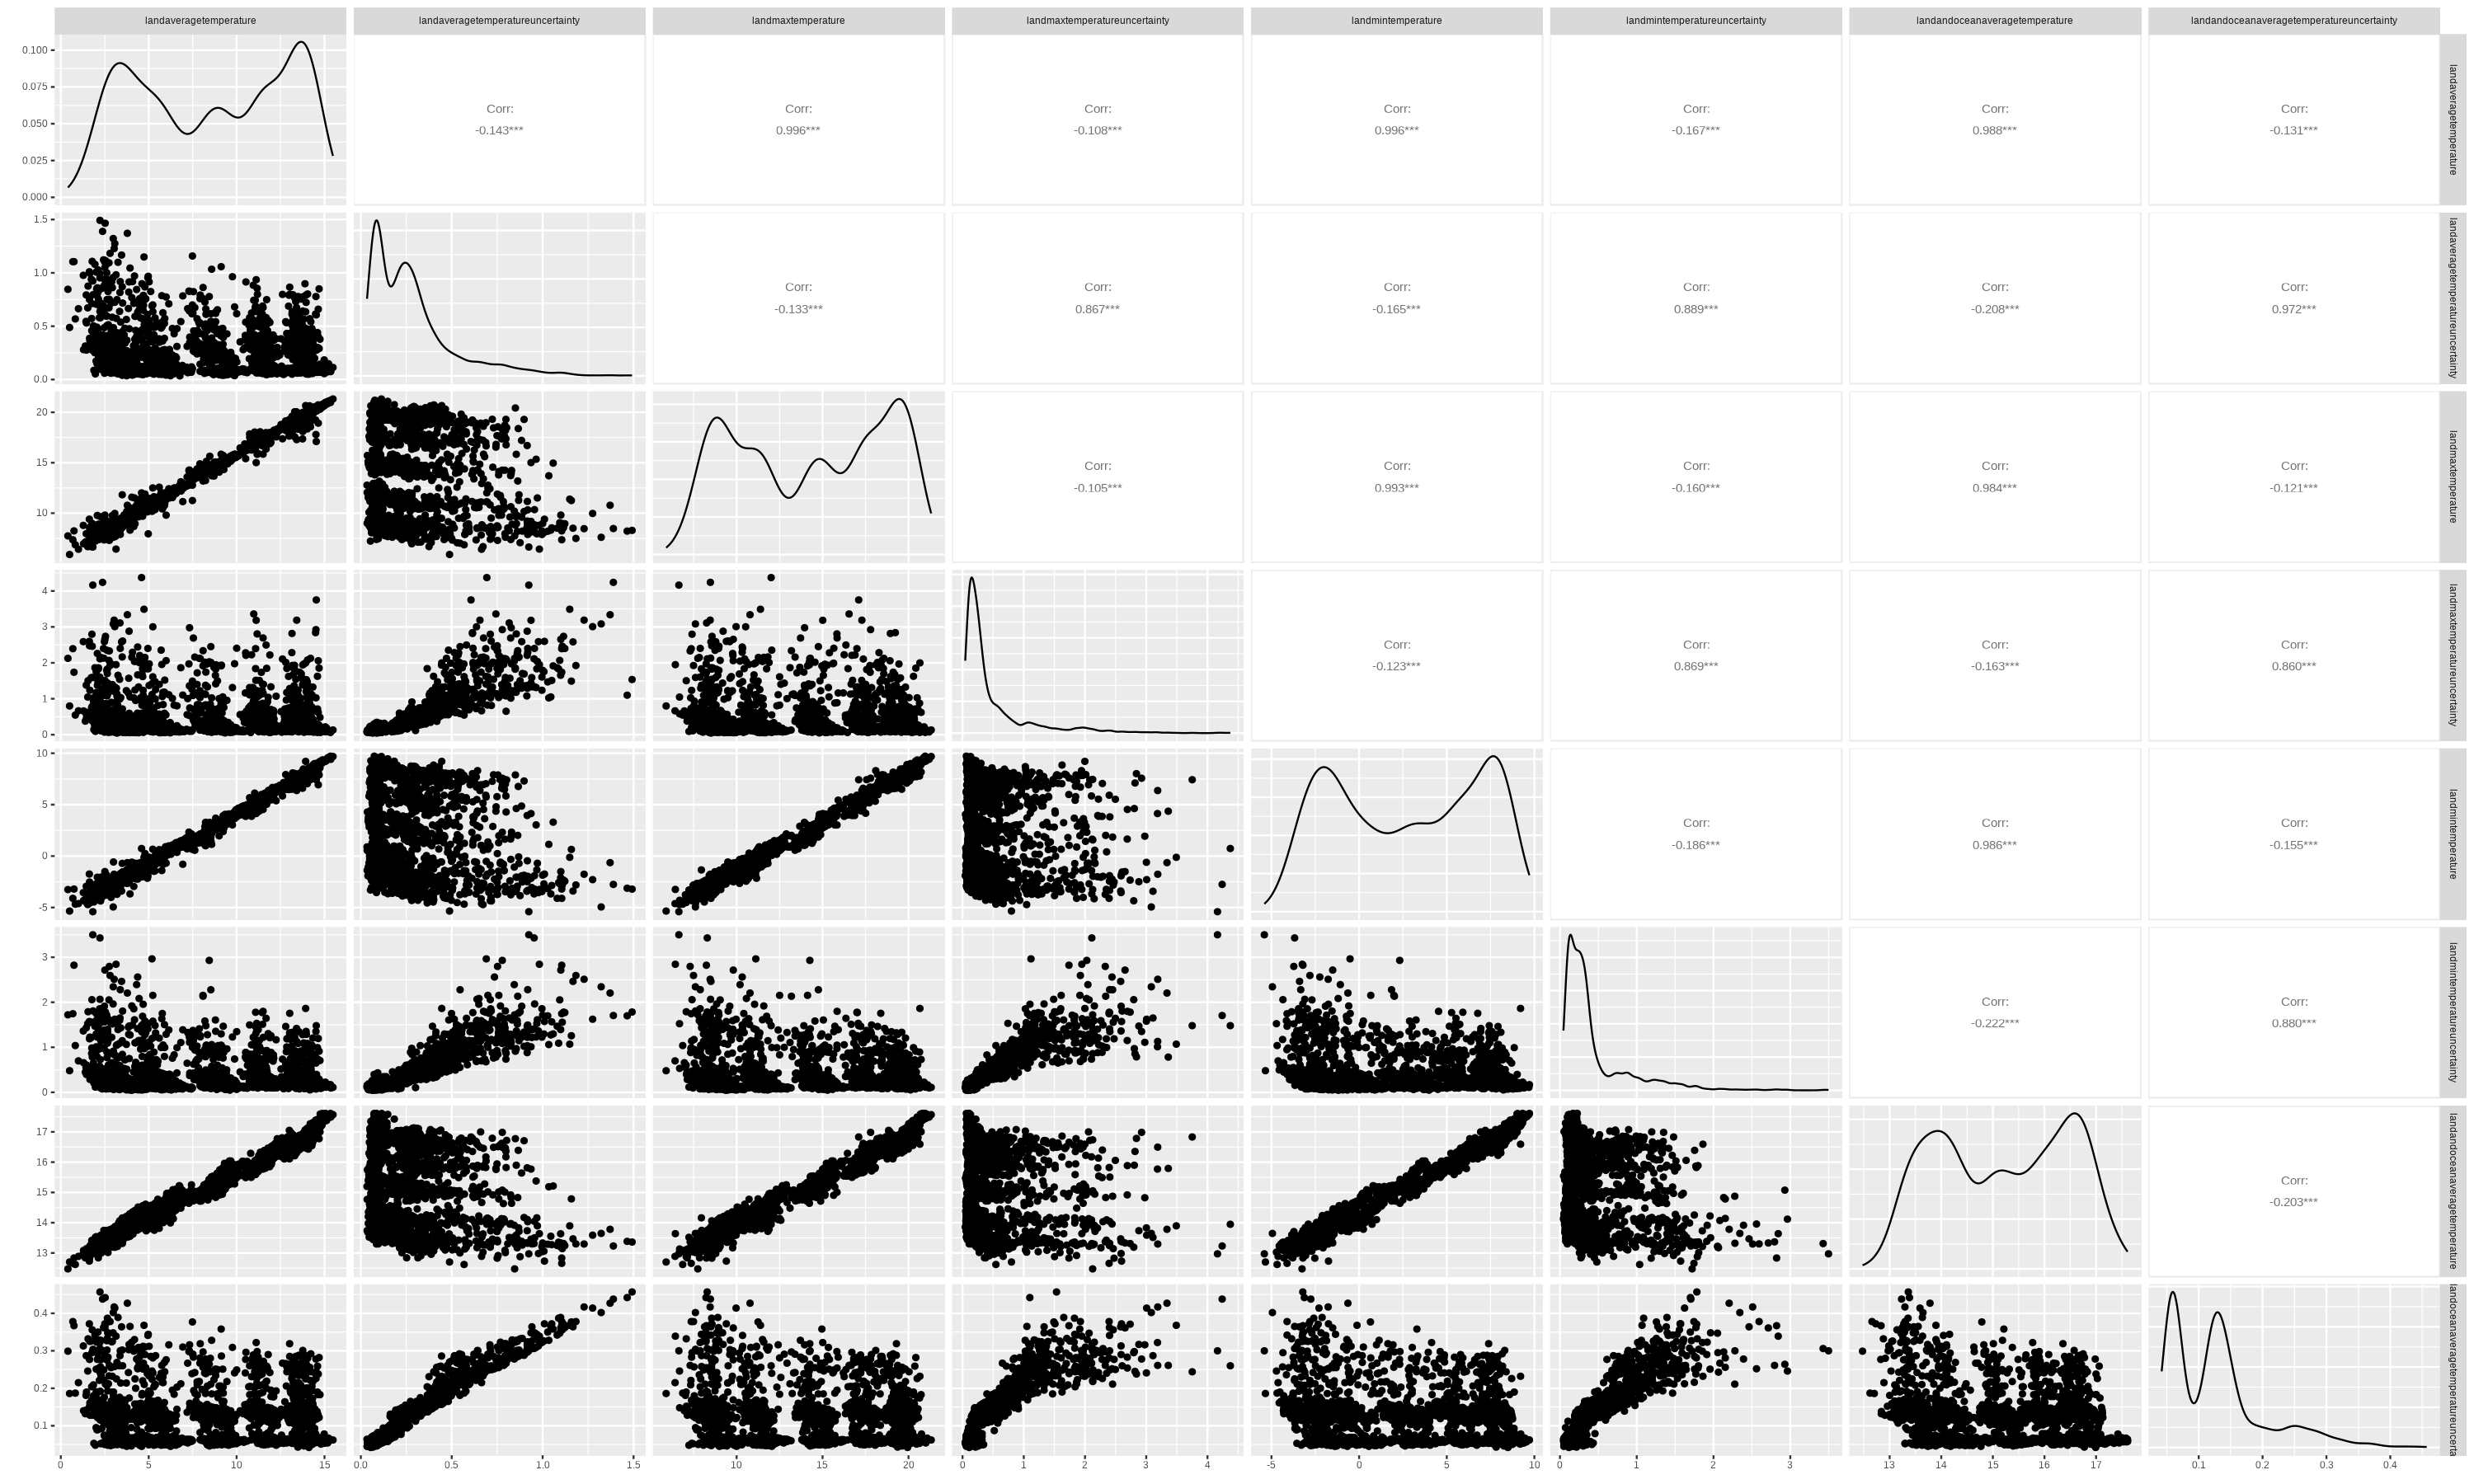

In [88]:
options(repr.plot.width=25, repr.plot.height=15)
df  %>%  select(-date) %>% ggpairs();

In [35]:

df  %>% summary()

     date           landaveragetemperature landaveragetemperatureuncertainty
 Length:1992        Min.   : 0.404         Min.   :0.03400                  
 Class :character   1st Qu.: 4.430         1st Qu.:0.09975                  
 Mode  :character   Median : 8.851         Median :0.23000                  
                    Mean   : 8.572         Mean   :0.27666                  
                    3rd Qu.:12.858         3rd Qu.:0.34725                  
                    Max.   :15.482         Max.   :1.49200                  
 landmaxtemperature landmaxtemperatureuncertainty landmintemperature
 Min.   : 5.90      Min.   :0.0440                Min.   :-5.407    
 1st Qu.:10.21      1st Qu.:0.1420                1st Qu.:-1.335    
 Median :14.76      Median :0.2520                Median : 2.950    
 Mean   :14.35      Mean   :0.4798                Mean   : 2.744    
 3rd Qu.:18.45      3rd Qu.:0.5390                3rd Qu.: 6.779    
 Max.   :21.32      Max.   :4.3730             

In [27]:
my_thems=theme(text = element_text(size = 30),
      plot.subtitle = element_text(size = 30),
      legend.title = element_text(size = 30),
      legend.text = element_text(size = 30),
      axis.text.x = element_text(size = 30)
      )

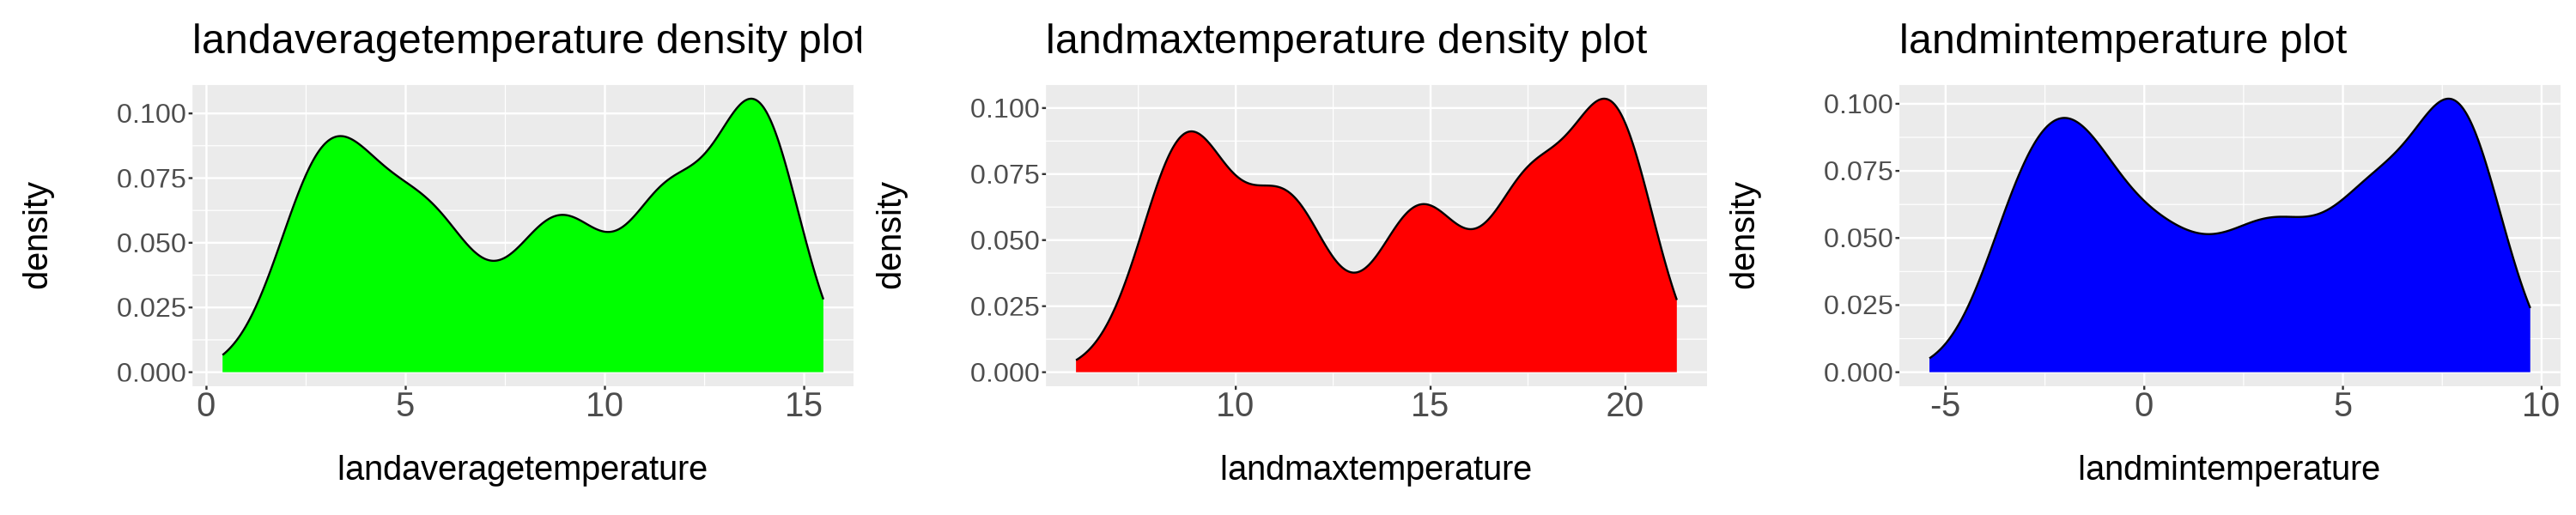

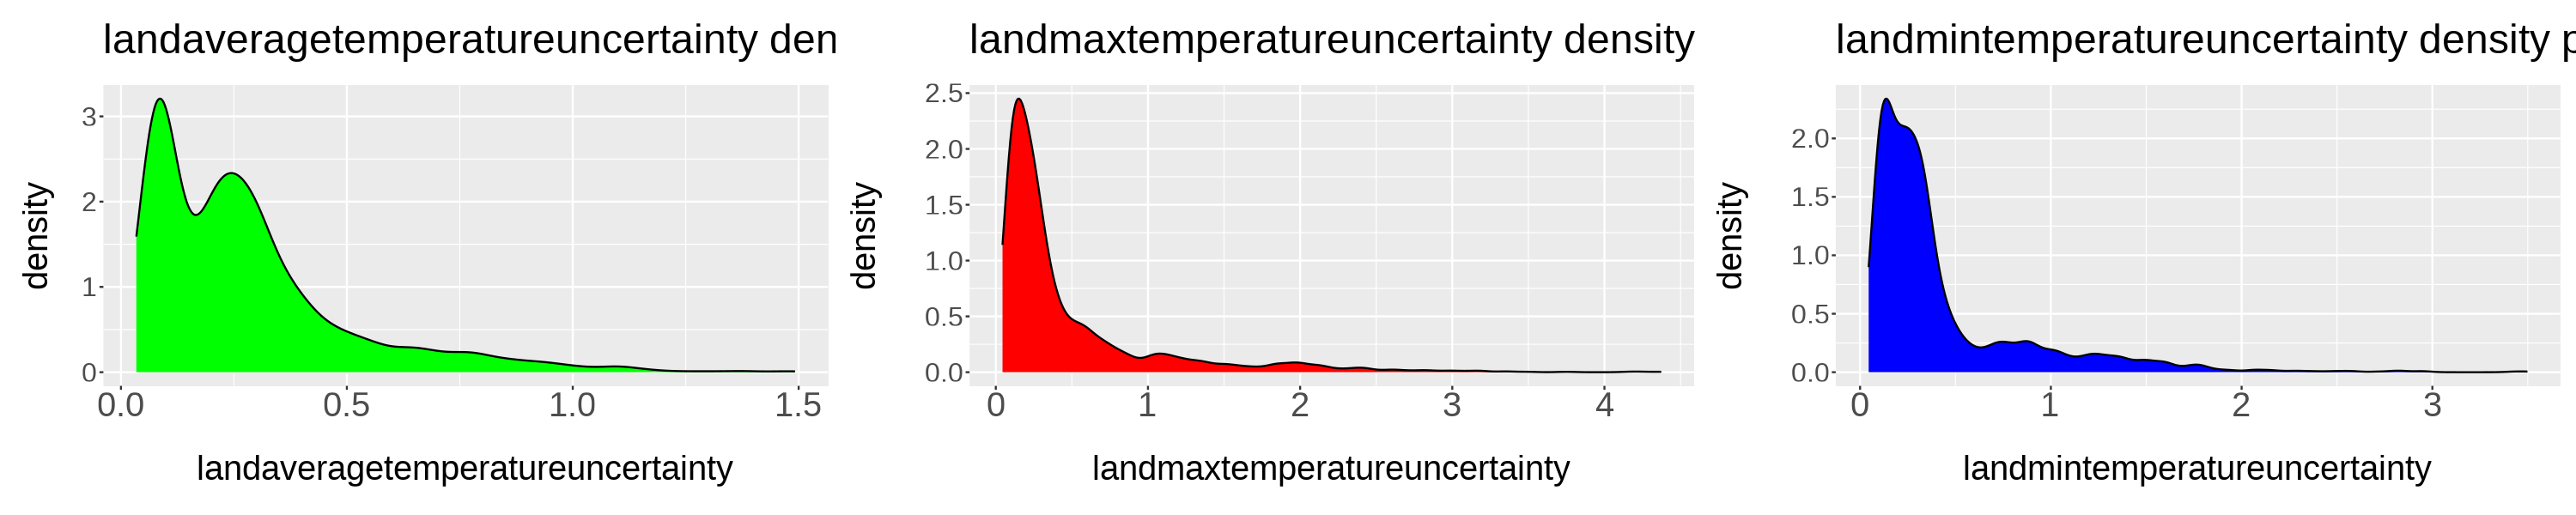

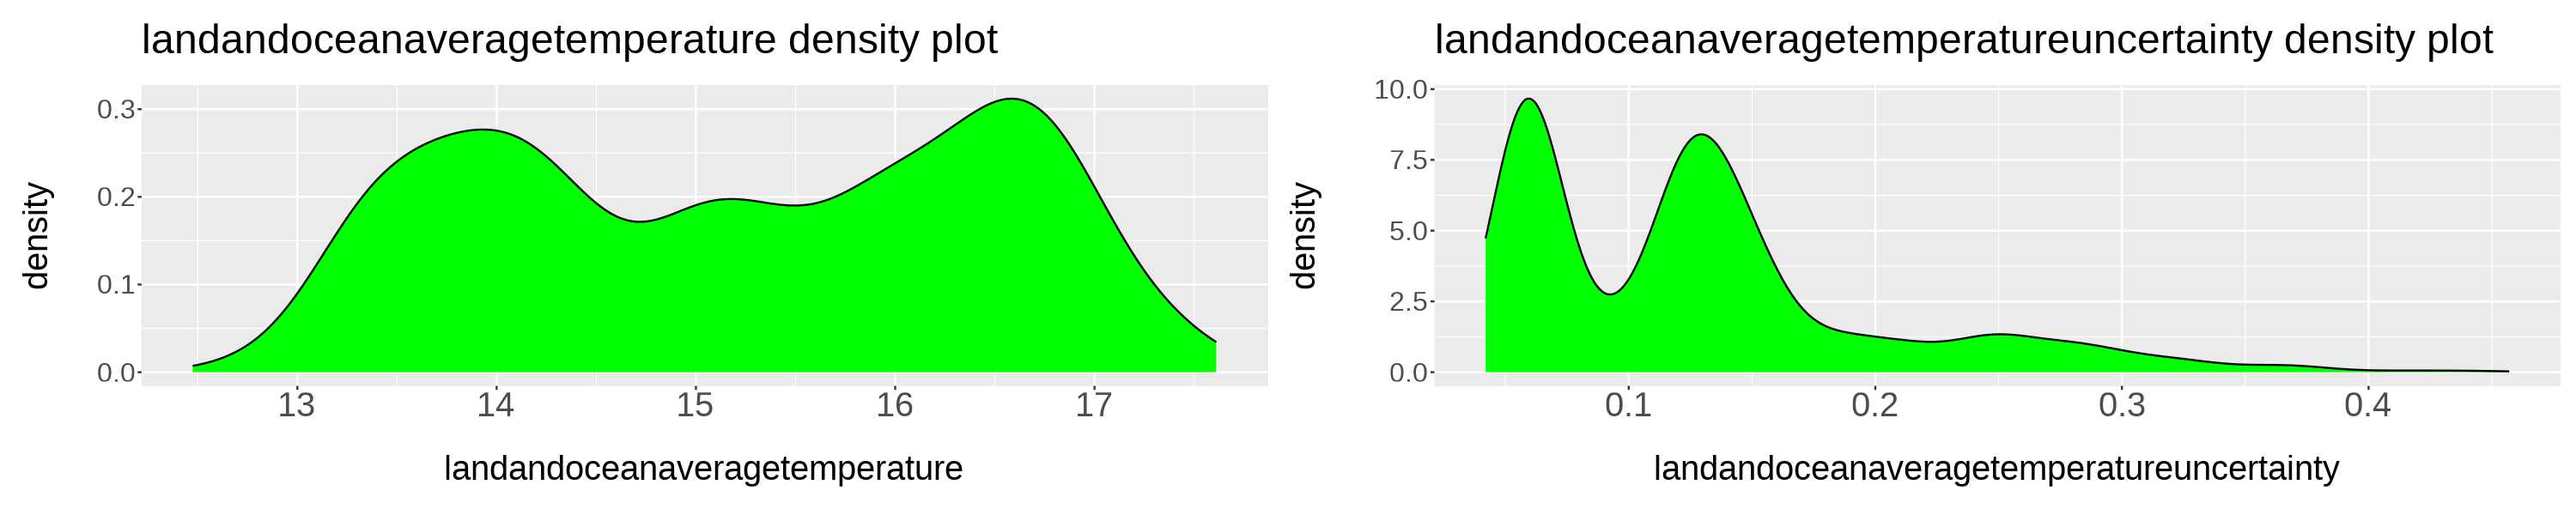

In [43]:
options(repr.plot.width=25, repr.plot.height=5);
df %>%  ggplot(aes(x= landaveragetemperature))+geom_density(fill="green")+ggtitle("landaveragetemperature density plot")+my_thems+
df %>%  ggplot(aes(x=landmaxtemperature))+geom_density(fill="red")+ggtitle("landmaxtemperature density plot")+my_thems+
df %>%  ggplot(aes(x=landmintemperature))+geom_density(fill="blue")+ggtitle("landmintemperature plot")+my_thems


df %>%  ggplot(aes(x=landaveragetemperatureuncertainty))+geom_density(fill="green")+ggtitle("landaveragetemperatureuncertainty density plot")+my_thems+
df %>%  ggplot(aes(x= landmaxtemperatureuncertainty))+geom_density(fill="red")+ggtitle("landmaxtemperatureuncertainty density plot")+my_thems+
df %>%  ggplot(aes(x=landmintemperatureuncertainty))+geom_density(fill="blue")+ggtitle("landmintemperatureuncertainty density plot")+my_thems


df %>%  ggplot(aes(x= landandoceanaveragetemperature))+geom_density(fill="green")+ggtitle("landandoceanaveragetemperature density plot")+my_thems+
df %>%  ggplot(aes(x=landandoceanaveragetemperatureuncertainty))+geom_density(fill="green")+ggtitle("landandoceanaveragetemperatureuncertainty density plot")+my_thems

---

*C.2. Interential Anaysis*

* *normality check : <br>1. Shapiro-Wilk Test:*<br>*A formal statistical test for normality.*<br> *The null hypothesis states that the data follows a normal distribution shape*

In [48]:
shapiro.test(df$landaveragetemperature)
shapiro.test(df$landaveragetemperatureuncertainty)
shapiro.test(df$landmaxtemperature)
shapiro.test(df$landmaxtemperatureuncertainty)
shapiro.test(df$landmintemperature)
shapiro.test(df$landmintemperatureuncertainty)
shapiro.test(df$landandoceanaveragetemperature)
shapiro.test(df$landandoceanaveragetemperatureuncertainty)


	Shapiro-Wilk normality test

data:  df$landaveragetemperature
W = 0.91678, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  df$landaveragetemperatureuncertainty
W = 0.83189, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  df$landmaxtemperature
W = 0.91536, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  df$landmaxtemperatureuncertainty
W = 0.66875, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  df$landmintemperature
W = 0.92463, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  df$landmintemperatureuncertainty
W = 0.7191, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  df$landandoceanaveragetemperature
W = 0.94388, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  df$landandoceanaveragetemperatureuncertainty
W = 0.86811, p-value < 2.2e-16


* *normality check : <br>2. anohter way by using normality function:*

In [89]:
df %>% select(-date)  %>%  normality()

vars                                      statistic p_value      sample
1 landaveragetemperature                    0.9167798 9.052602e-32 1992  
2 landaveragetemperatureuncertainty         0.8318864 1.371041e-41 1992  
3 landmaxtemperature                        0.9153644 5.462724e-32 1992  
4 landmaxtemperatureuncertainty             0.6687476 2.270999e-52 1992  
5 landmintemperature                        0.9246335 1.698760e-30 1992  
6 landmintemperatureuncertainty             0.7190997 1.245618e-49 1992  
7 landandoceanaveragetemperature            0.9438782 7.171778e-27 1992  
8 landandoceanaveragetemperatureuncertainty 0.8681084 4.807105e-38 1992

> *as  the p-value is less than the chosen significance level (0.05) :<br> we will reject the null hypothesis, suggesting that the data may come from a normal distribution ; and will accept the alternative hypothesis*

---

*C.2.1 Numeric Analysis*

* *Non parametric Spearman correlation for non liner and non normally distributed features*

---

* *(landaveragetemperature ~ landmintemperature)  &<br> (landaveragetemperature ~ landmaxtemperature)*


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


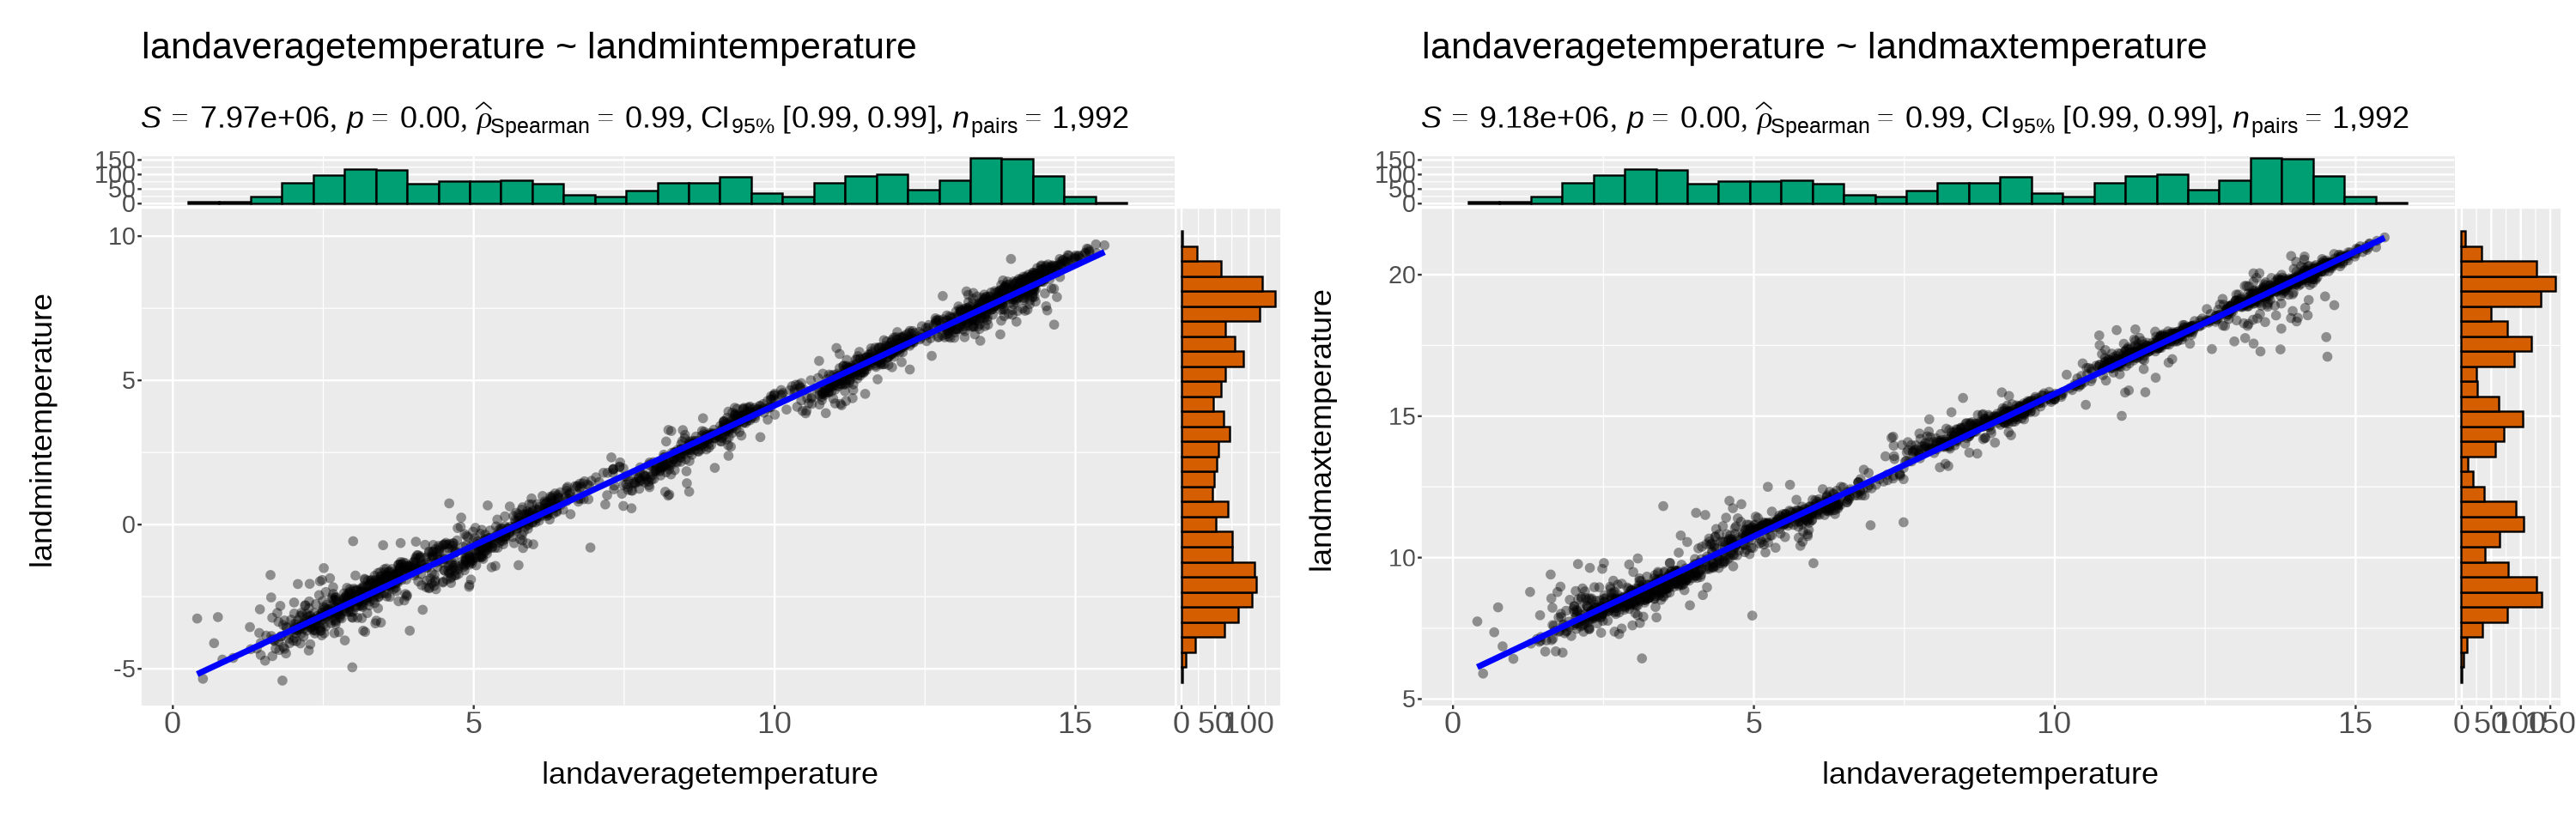

In [93]:
my_thems=theme(text = element_text(size = 27),
      plot.subtitle = element_text(size = 27),
      legend.title = element_text(size = 27),
      legend.text = element_text(size = 27),
      axis.text.x = element_text(size = 27)
      )
options(repr.plot.width=25, repr.plot.height=8);
ggscatterstats(data=df,x = landaveragetemperature,y = landmintemperature,type = "np",ggtheme = ggplot2::theme_gray(),title = "landaveragetemperature ~ landmintemperature")+my_thems+
ggscatterstats(data=df,x = landaveragetemperature,y = landmaxtemperature,type = "np",ggtheme = ggplot2::theme_gray(),title = "landaveragetemperature ~ landmaxtemperature")+my_thems

> *From the above graphs we can get that :*

> *The pvalue in both charts is less than 0.05 --> we will reject the null hypothesis that stats there is no correlation between the varaibles and accept the null hypothesis*

> *The spearman value shows that the correlation is very strong 0.99 and it is a positive correlation*

---

* *(landaveragetemperature ~ landmaxtemperatureuncertainty)  &<br>  (landaveragetemperature ~ landmintemperatureuncertainty) &<br> (landaveragetemperature ~ landaveragetemperatureuncertainty)* 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


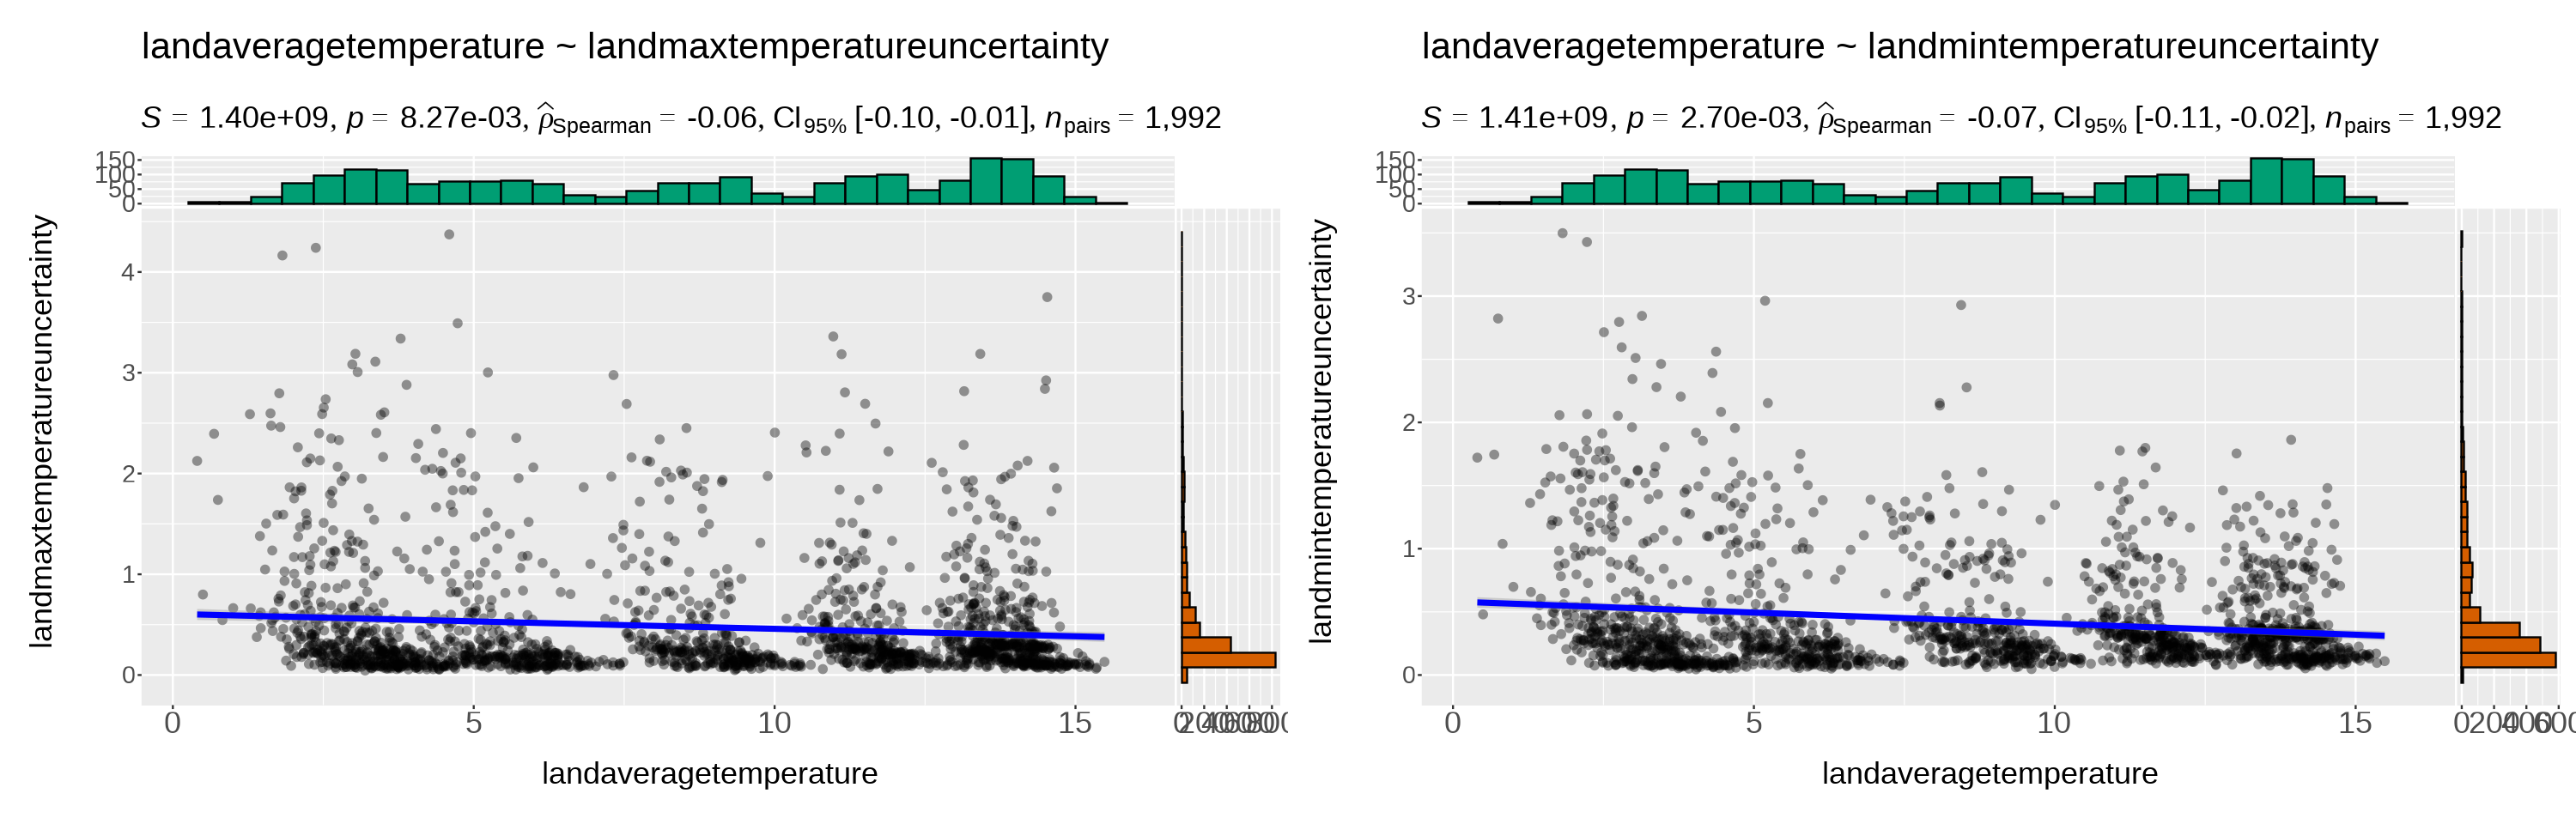

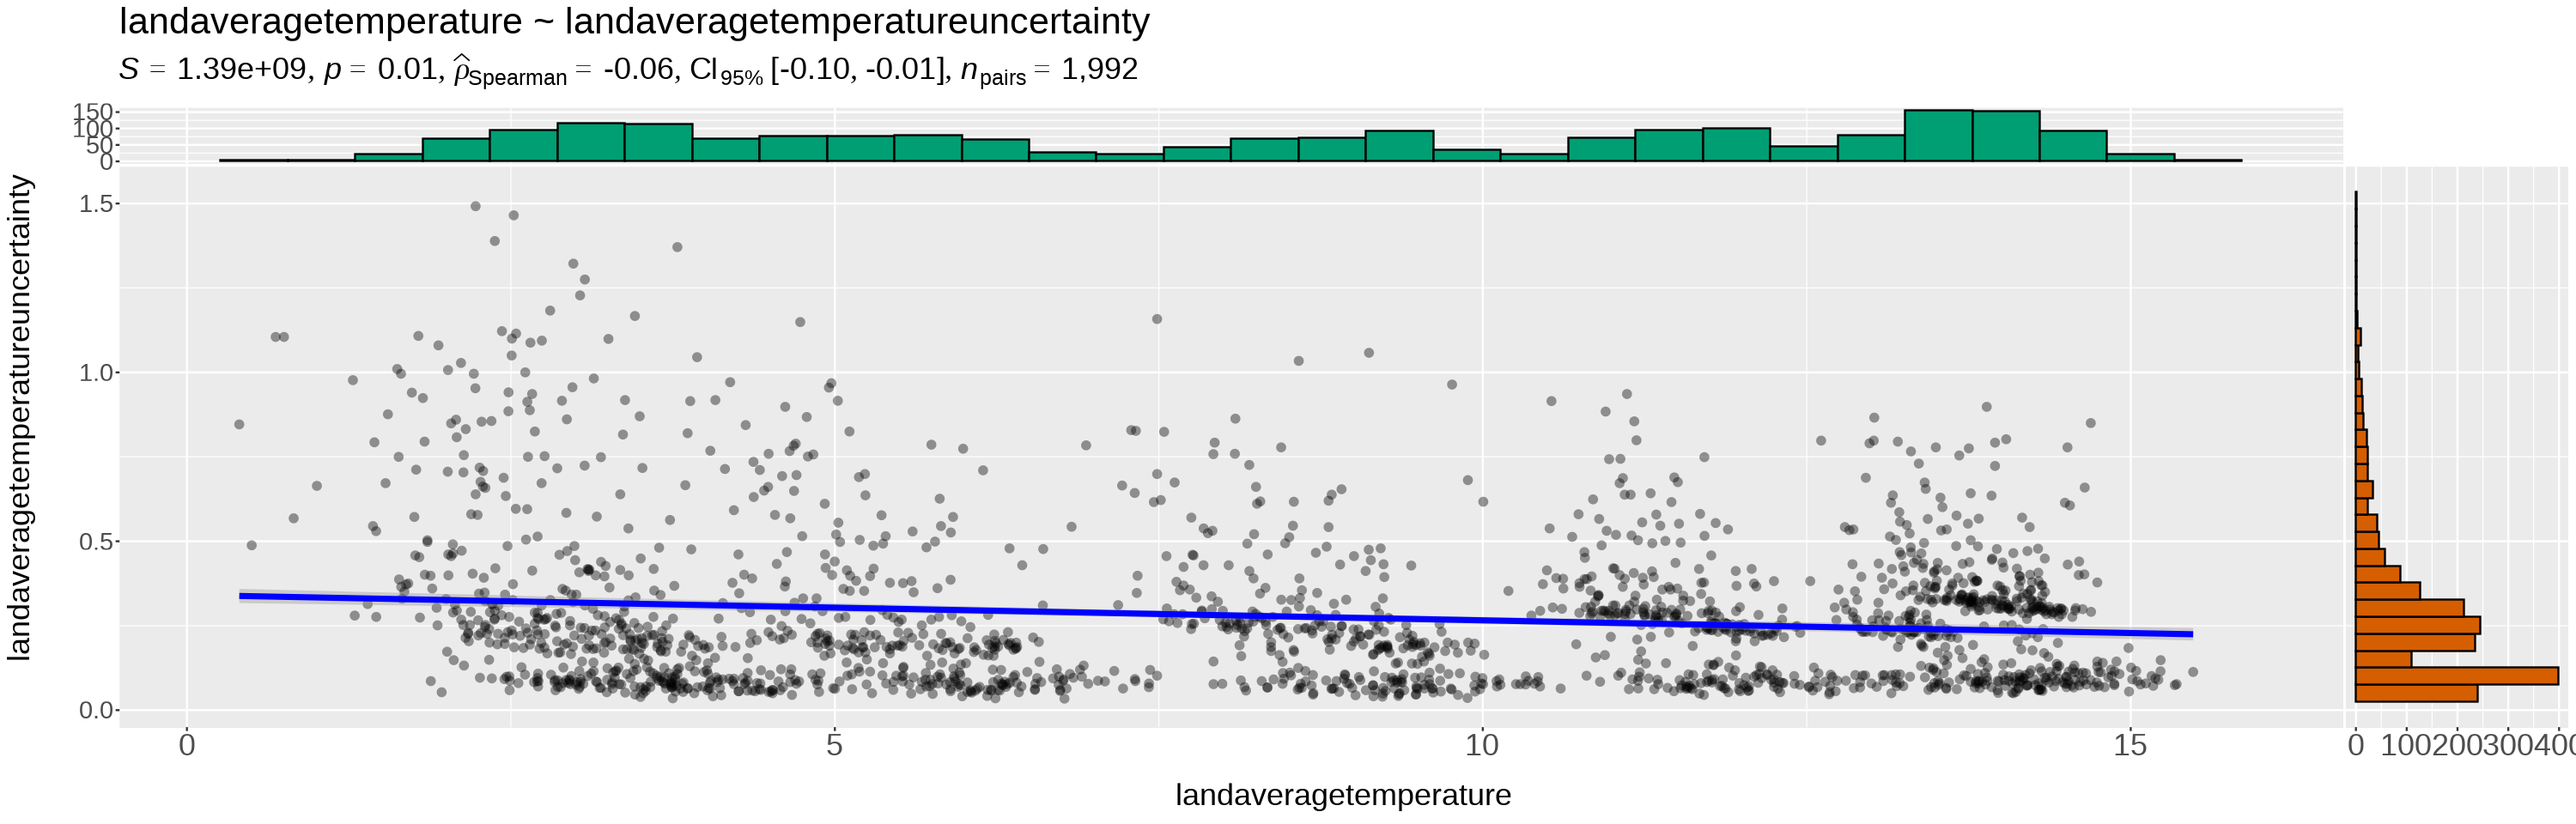

In [94]:
ggscatterstats(data=df,x = landaveragetemperature,y = landmaxtemperatureuncertainty,type = "np",ggtheme = ggplot2::theme_gray(),title = "landaveragetemperature ~ landmaxtemperatureuncertainty")+my_thems+
ggscatterstats(data=df,x = landaveragetemperature,y = landmintemperatureuncertainty,type = "np",ggtheme = ggplot2::theme_gray(),title = "landaveragetemperature ~ landmintemperatureuncertainty")+my_thems

ggscatterstats(data=df,x = landaveragetemperature,y = landaveragetemperatureuncertainty,type = "np",ggtheme = ggplot2::theme_gray(),title = "landaveragetemperature ~ landaveragetemperatureuncertainty")+my_thems

> *From the above graphs we can get that :*

> *The pvalue in all charts is less than 0.05 --> we will reject the null hypothesis that stats there is no correlation between the varaibles and accept the null hypothesis*

> *The spearman value shows that the correlation is very weak as it is less than 0.20 and it is a Negative correlation*

---

* *(landaveragetemperature ~ landandoceanaveragetemperature)  &<br>  (landaveragetemperature ~ landandoceanaveragetemperatureuncertainty)*

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


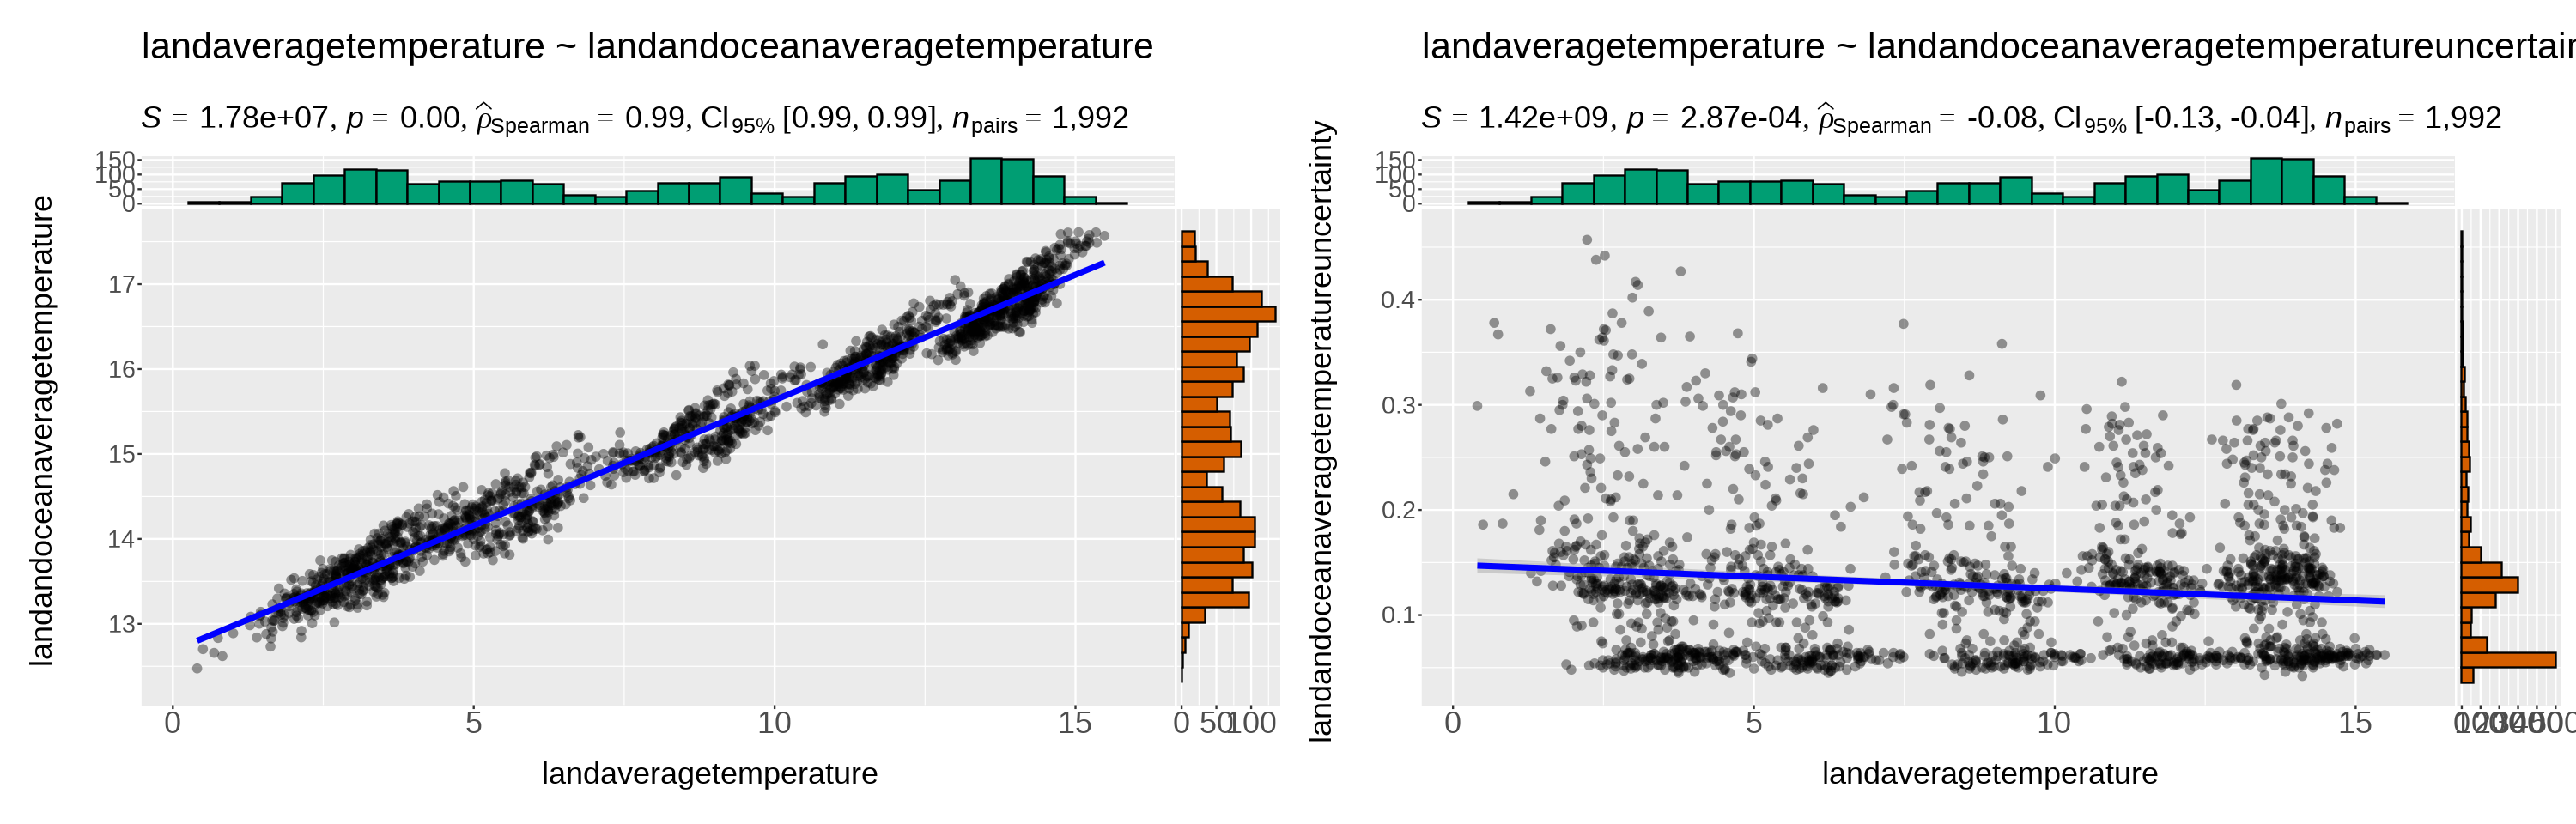

In [95]:
ggscatterstats(data=df,x = landaveragetemperature,y = landandoceanaveragetemperature,type = "np",ggtheme = ggplot2::theme_gray(),title = "landaveragetemperature ~ landandoceanaveragetemperature")+my_thems+
ggscatterstats(data=df,x = landaveragetemperature,y = landandoceanaveragetemperatureuncertainty,type = "np",ggtheme = ggplot2::theme_gray(),title = "landaveragetemperature ~ landandoceanaveragetemperatureuncertainty")+my_thems

> *From the above graphs we can get that :*

> *1. for (landaveragetemperatureuncertainty ~landandoceanaveragetemperature) :<br>The pvalue is less than 0.05 --> we will reject the null hypothesis that stats there is no correlation between the varaibles and accept the null hypothesis<br>The spearman value shows that the correlation is very strong 0.99 and it is a positive correlation*

> *2. for (landaveragetemperatureuncertainty ~landandoceanaveragetemperatureuncertainty) :<br>The pvalue is less than 0.05 --> we will reject the null hypothesis that stats there is no correlation between the varaibles and accept the null hypothesis<br>The spearman value shows that the correlation is very weak as it is less than 0.20 and it is a Negative correlation*

---

* *(landaveragetemperatureuncertainty ~ landmaxtemperature)  &<br>  (landaveragetemperatureuncertainty ~ landmaxtemperatureuncertainty)*

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


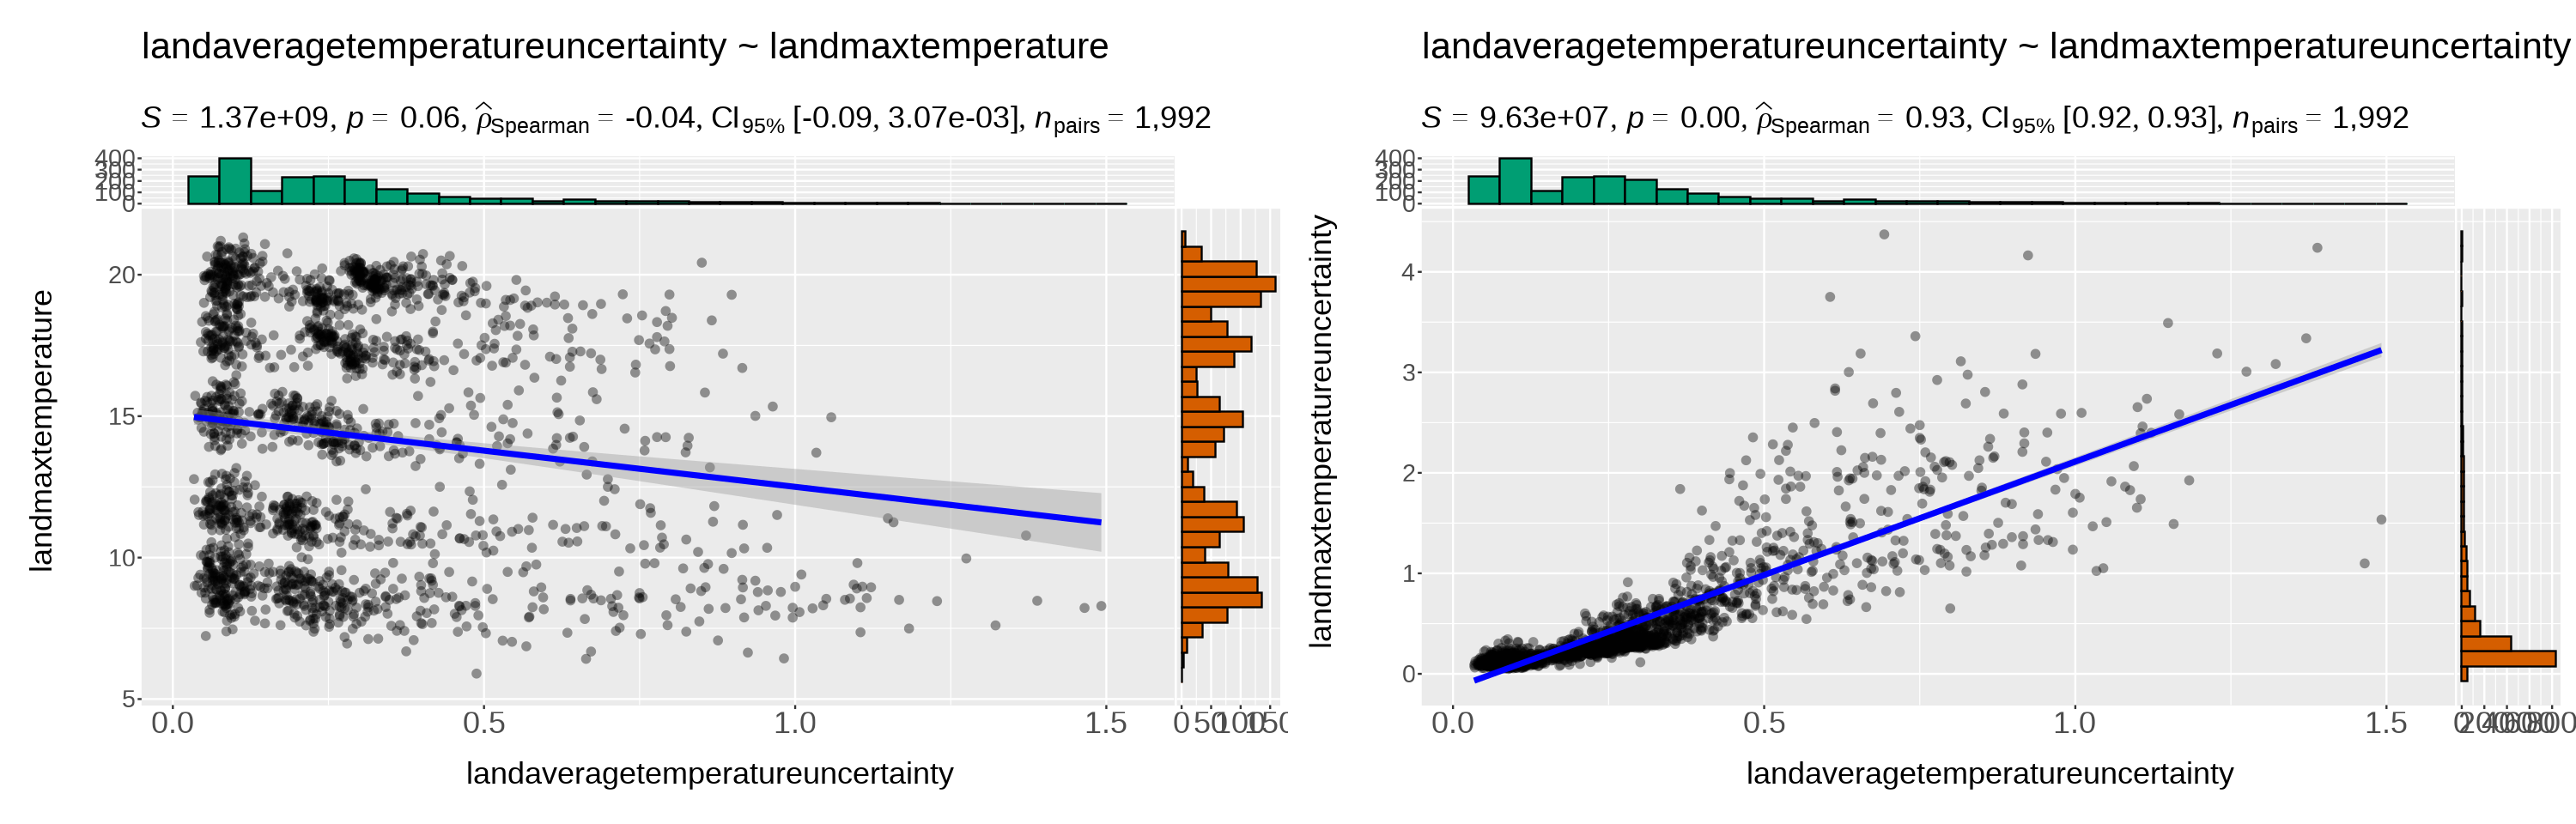

In [106]:
ggscatterstats(data=df,x = landaveragetemperatureuncertainty,y = landmaxtemperature,type = "np",ggtheme = ggplot2::theme_gray(),title = "landaveragetemperatureuncertainty ~ landmaxtemperature")+my_thems+
ggscatterstats(data=df,x = landaveragetemperatureuncertainty,y = landmaxtemperatureuncertainty,type = "np",ggtheme = ggplot2::theme_gray(),title = "landaveragetemperatureuncertainty ~ landmaxtemperatureuncertainty")+my_thems

> *From the above graphs we can get that :*

> *1. for (landaveragetemperatureuncertainty ~ landmaxtemperature) :<br>The pvalue is more than 0.05 --> we will accept the null hypothesis that stats there is no significant correlation between the varaibles <br>The spearman value shows that the correlation is very weak 0.04 and it is a Negative correlation*

> *2. for (landaveragetemperatureuncertainty ~landmaxtemperatureuncertainty) :<br>The pvalue is less than 0.05 --> we will reject the null hypothesis that stats there is no correlation between the varaibles and accept the null hypothesis<br>The spearman value shows that the correlation is very strong 0.93 and it is positive correlation*

---

* *(landaveragetemperatureuncertainty ~ landmintemperature)  &<br>  (landaveragetemperatureuncertainty ~ landmintemperatureuncertainty)*

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


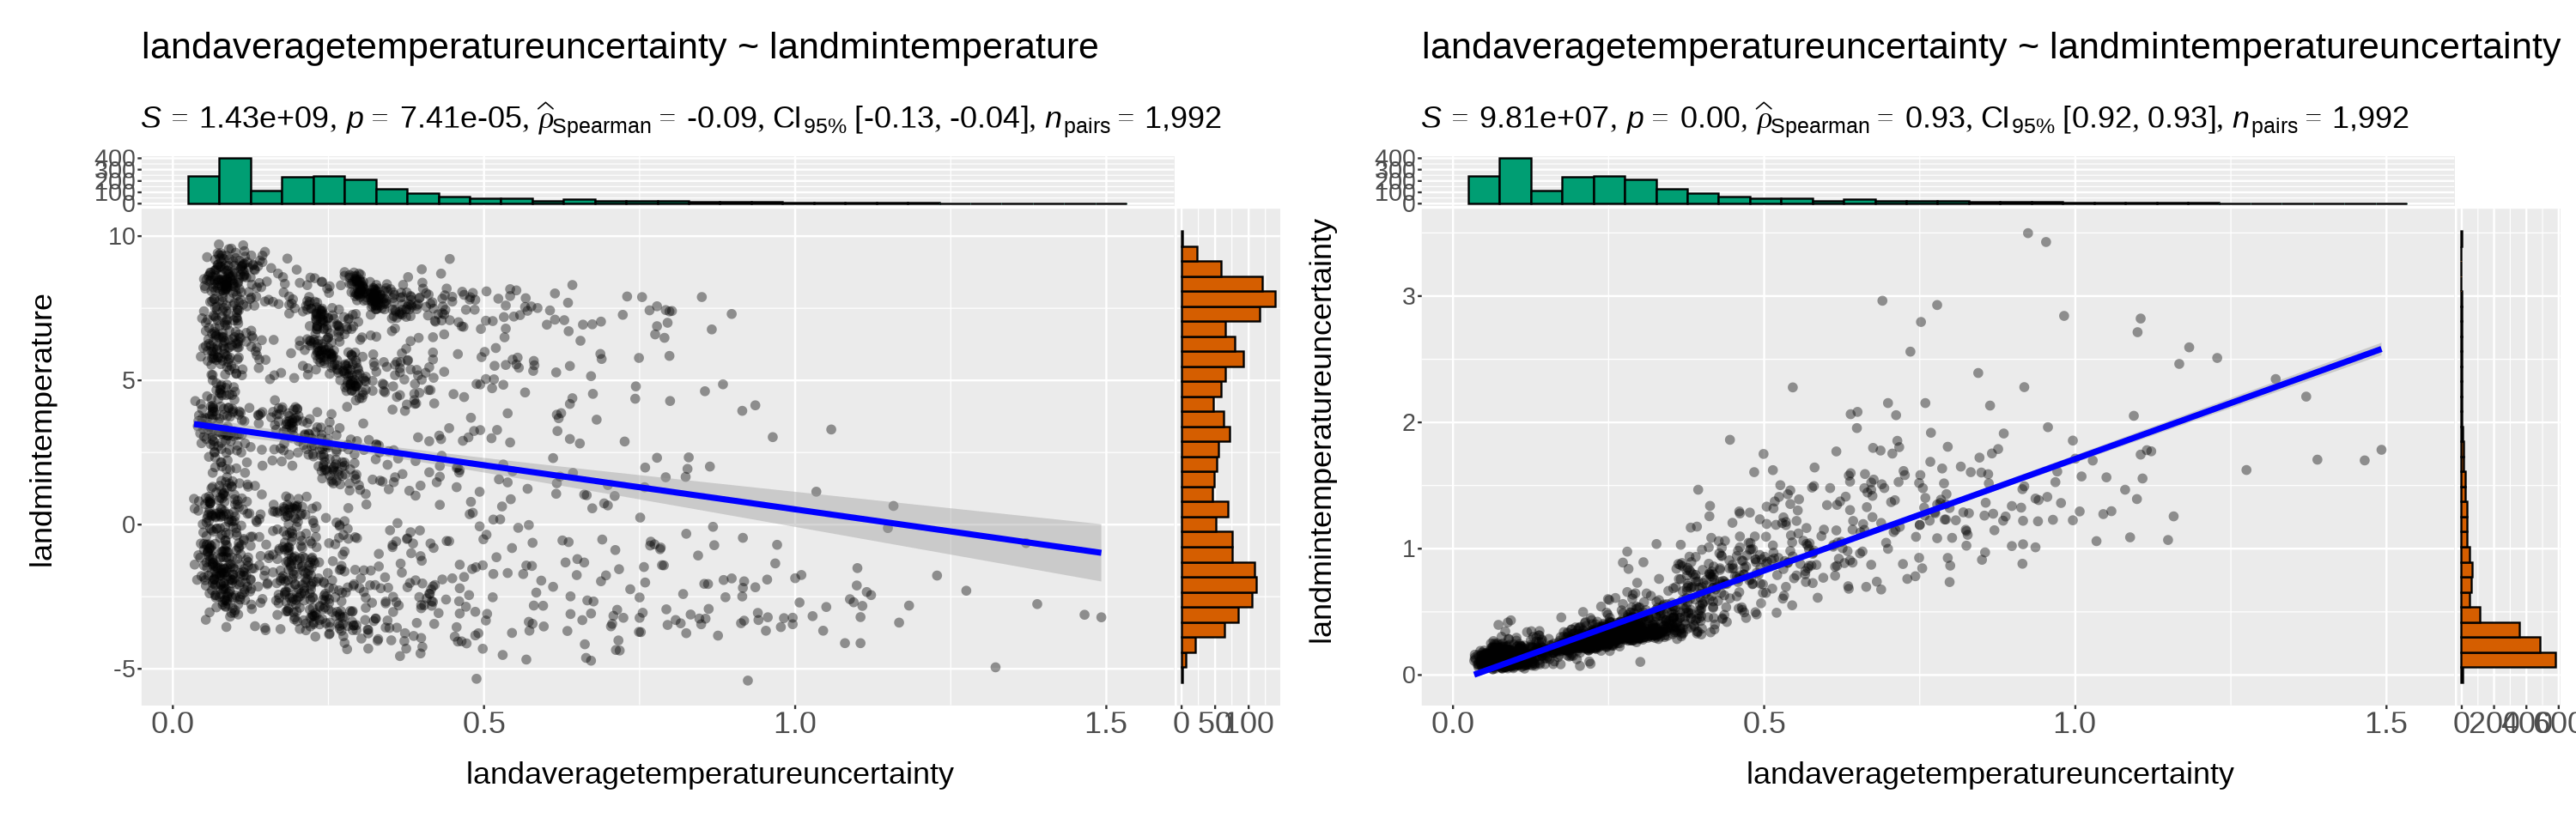

In [104]:
ggscatterstats(data=df,x = landaveragetemperatureuncertainty,y = landmintemperature,type = "np",ggtheme = ggplot2::theme_gray(),title = "landaveragetemperatureuncertainty ~ landmintemperature")+my_thems+
ggscatterstats(data=df,x = landaveragetemperatureuncertainty,y = landmintemperatureuncertainty,type = "np",ggtheme = ggplot2::theme_gray(),title = "landaveragetemperatureuncertainty ~ landmintemperatureuncertainty")+my_thems

> *From the above graphs we can get that :*

> *1. for (landaveragetemperatureuncertainty ~ landmintemperature) :<br>The pvalue is more than 0.05 --> we will reject the null hypothesis that stats there is no significant correlation between the varaibles <br>The spearman value shows that the correlation is very weak 0.09 and it is a Negative correlation*

> *2. for (landaveragetemperatureuncertainty ~landmintemperatureuncertainty) :<br>The pvalue is less than 0.05 --> we will reject the null hypothesis that stats there is no correlation between the varaibles and accept the null hypothesis<br>The spearman value shows that the correlation is very strong 0.93 and it is positive correlation*

---

* *(landaveragetemperatureuncertainty ~ landandoceanaveragetemperature)  &<br>  (landaveragetemperatureuncertainty ~ landandoceanaveragetemperatureuncertainty)*

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


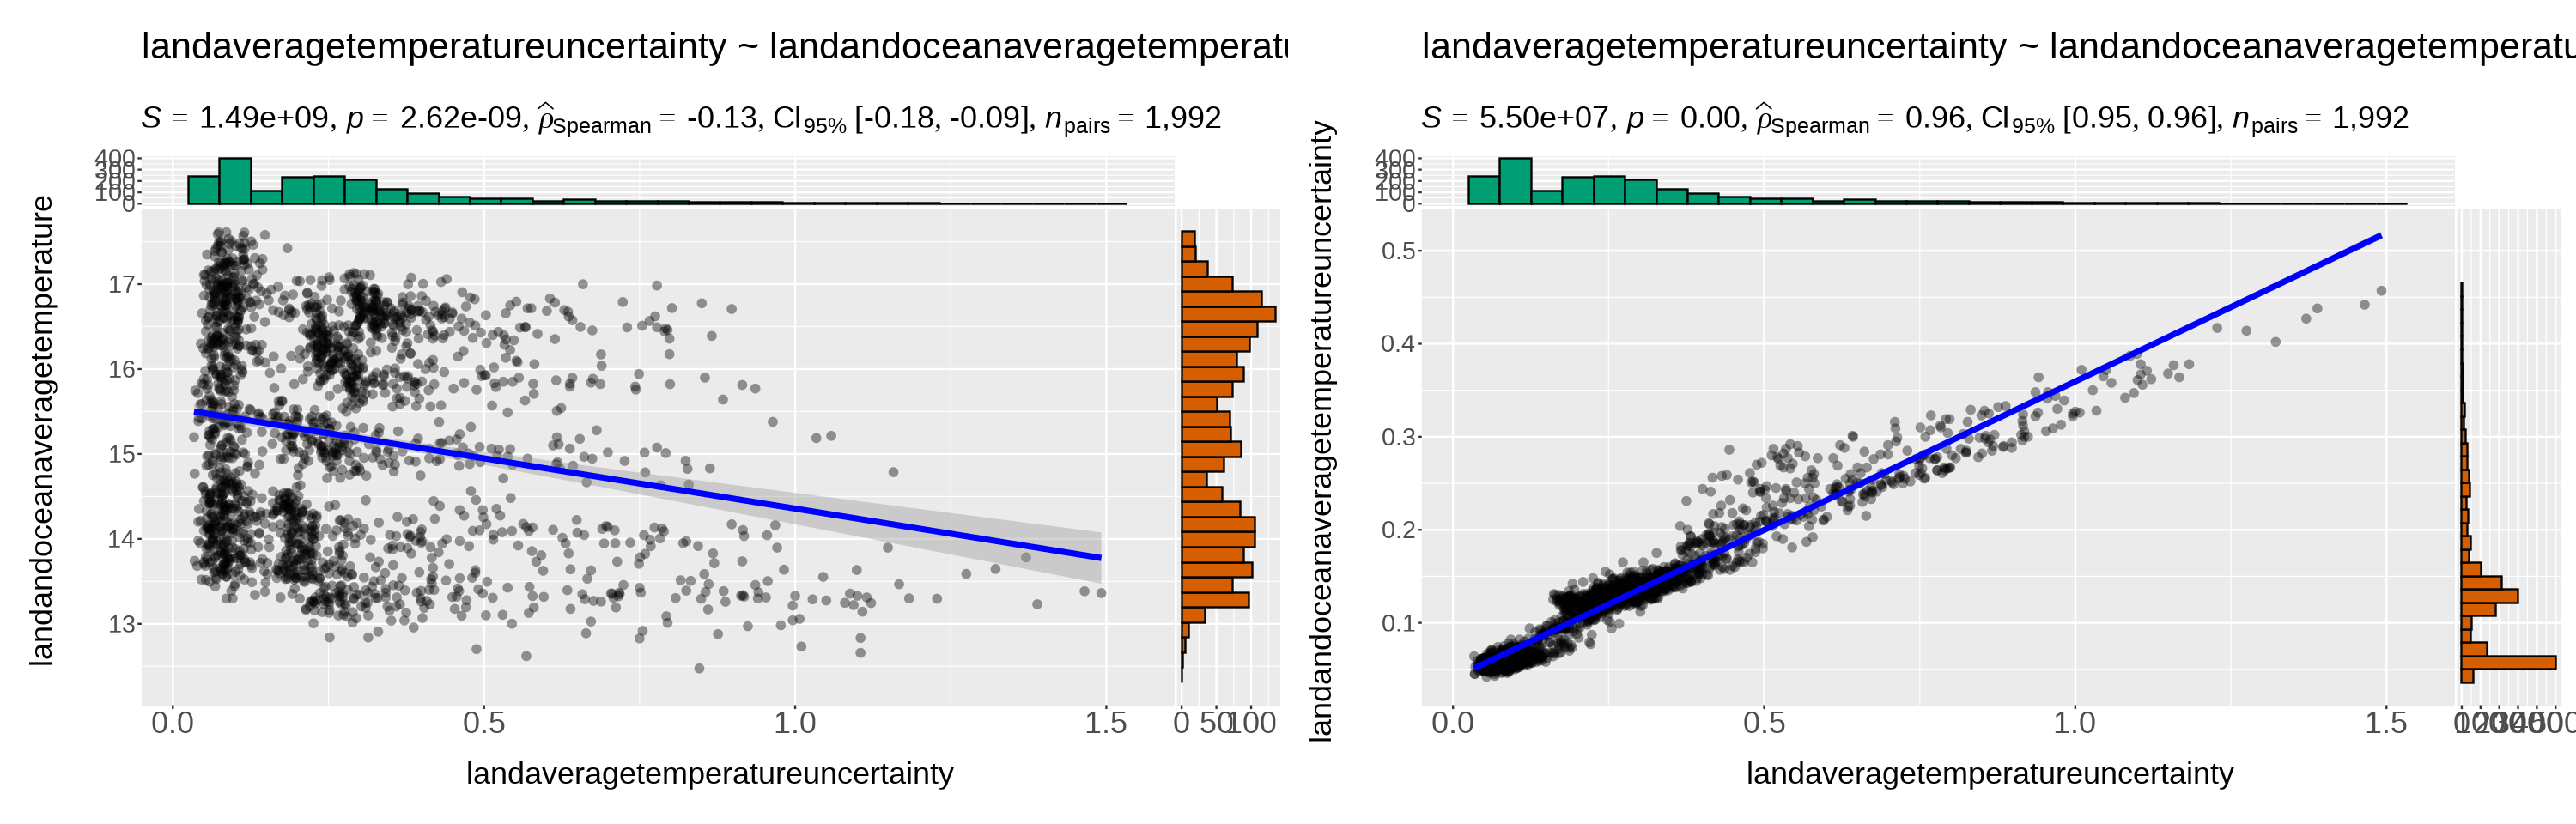

In [103]:
ggscatterstats(data=df,x = landaveragetemperatureuncertainty,y = landandoceanaveragetemperature,type = "np",ggtheme = ggplot2::theme_gray(),title = "landaveragetemperatureuncertainty ~ landandoceanaveragetemperature")+my_thems+
ggscatterstats(data=df,x = landaveragetemperatureuncertainty,y = landandoceanaveragetemperatureuncertainty,type = "np",ggtheme = ggplot2::theme_gray(),title = "landaveragetemperatureuncertainty ~ landandoceanaveragetemperatureuncertainty")+my_thems

> *From the above graphs we can get that :*

> *1. for (landaveragetemperatureuncertainty ~ landandoceanaveragetemperature) :<br>The pvalue is more than 0.05 --> we will reject the null hypothesis that stats there is no significant correlation between the varaibles <br>The spearman value shows that the correlation is very weak 0.13 and it is a Negative correlation*

> *2. for (landaveragetemperatureuncertainty ~landandoceanaveragetemperatureuncertainty) :<br>The pvalue is less than 0.05 --> we will reject the null hypothesis that stats there is no correlation between the varaibles and accept the null hypothesis<br>The spearman value shows that the correlation is very strong 0.96 and it is positive correlation*

---

* *(landmaxtemperature ~ landmaxtemperatureuncertainty)  &<br>  (landmaxtemperature ~ landmintemperature)*

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


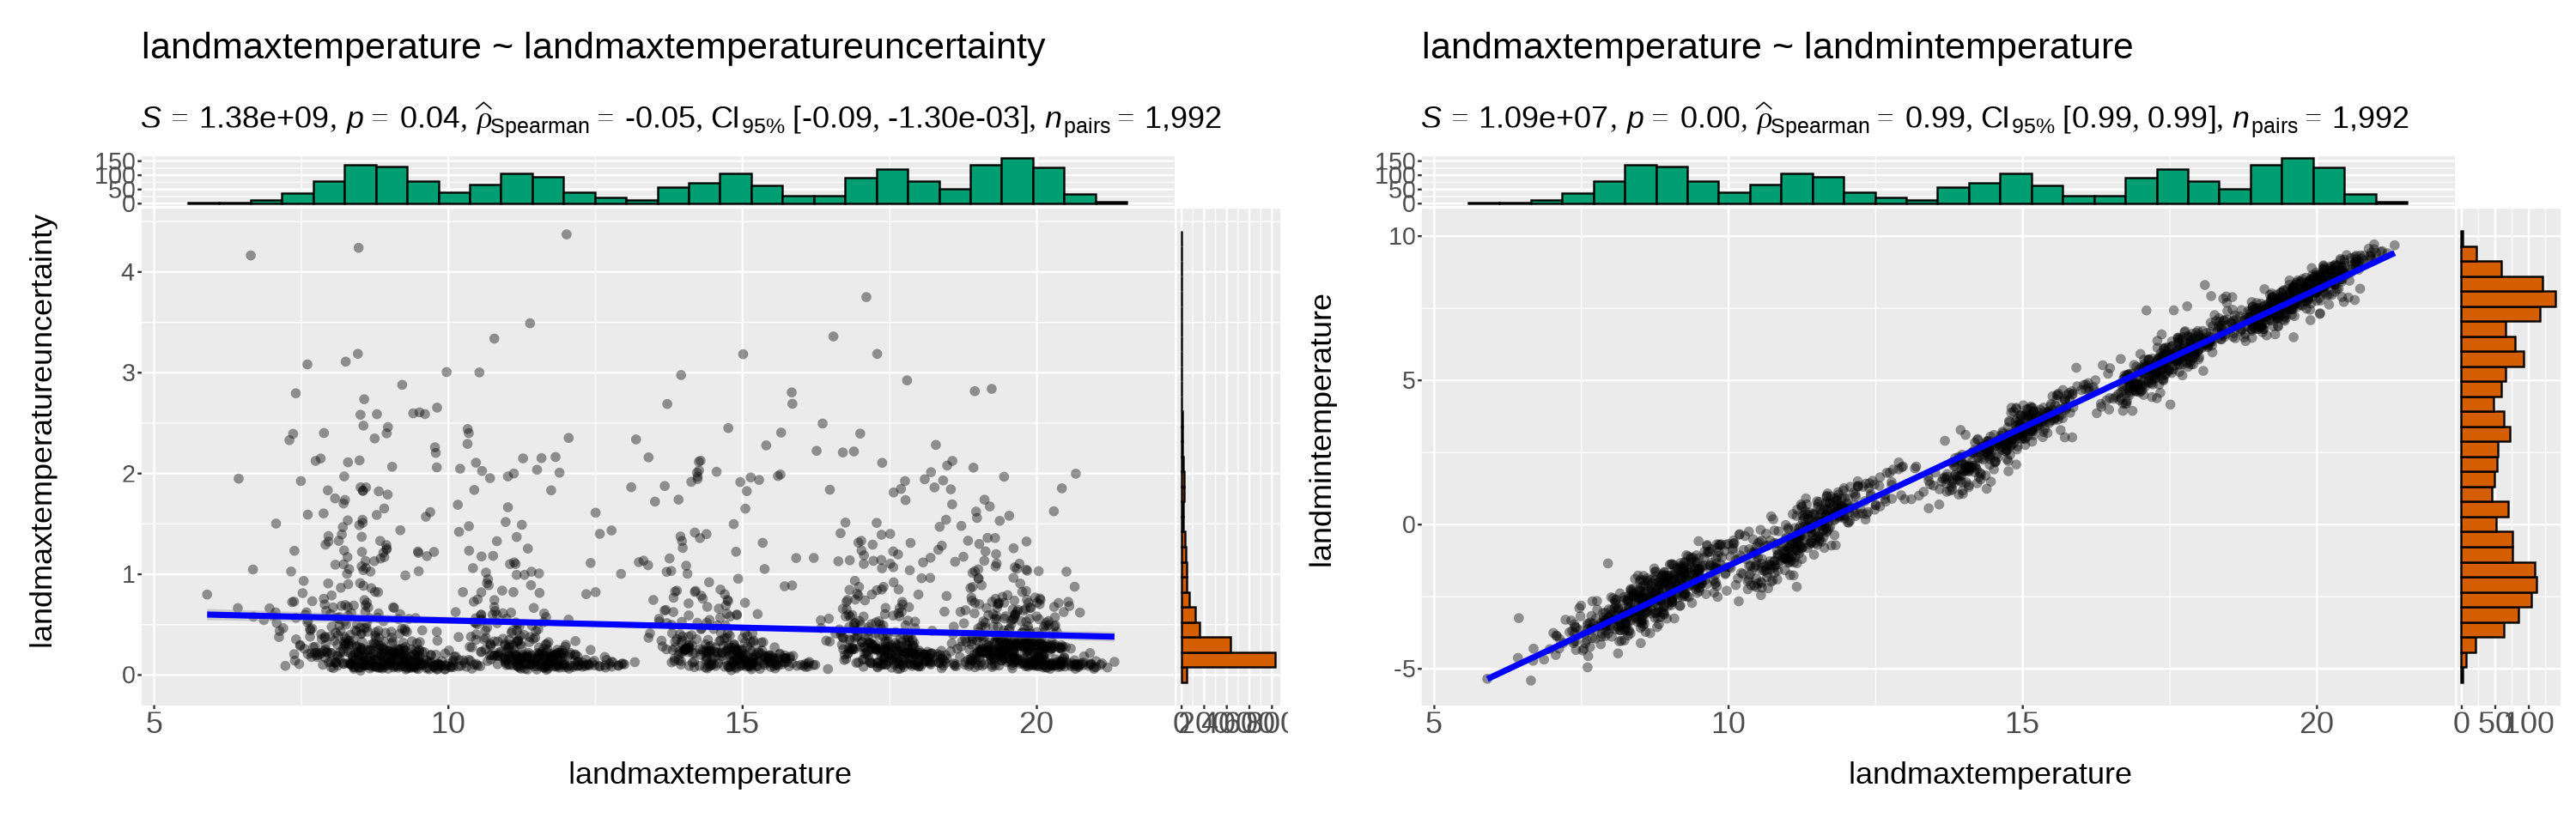

In [102]:
ggscatterstats(data=df,x = landmaxtemperature,y = landmaxtemperatureuncertainty,type = "np",ggtheme = ggplot2::theme_gray(),title = "landmaxtemperature ~ landmaxtemperatureuncertainty")+my_thems+
ggscatterstats(data=df,x = landmaxtemperature,y = landmintemperature,type = "np",ggtheme = ggplot2::theme_gray(),title = "landmaxtemperature ~ landmintemperature")+my_thems

> *From the above graphs we can get that :*

> *1. for (landmaxtemperature ~ landmaxtemperatureuncertainty) :<br>The pvalue is more than 0.05 --> we will reject the null hypothesis that stats there is no significant correlation between the varaibles <br>The spearman value shows that the correlation is very weak 0.05 and it is a Negative correlation*

> *2. for (landmaxtemperature ~landmintemperature) :<br>The pvalue is less than 0.05 --> we will reject the null hypothesis that stats there is no correlation between the varaibles and accept the null hypothesis<br>The spearman value shows that the correlation is very strong 0.99 and it is positive correlation*

---

* *(landmaxtemperature ~ landmintemperatureuncertainty)  &<br>  (landmaxtemperature ~ landandoceanaveragetemperature)*

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


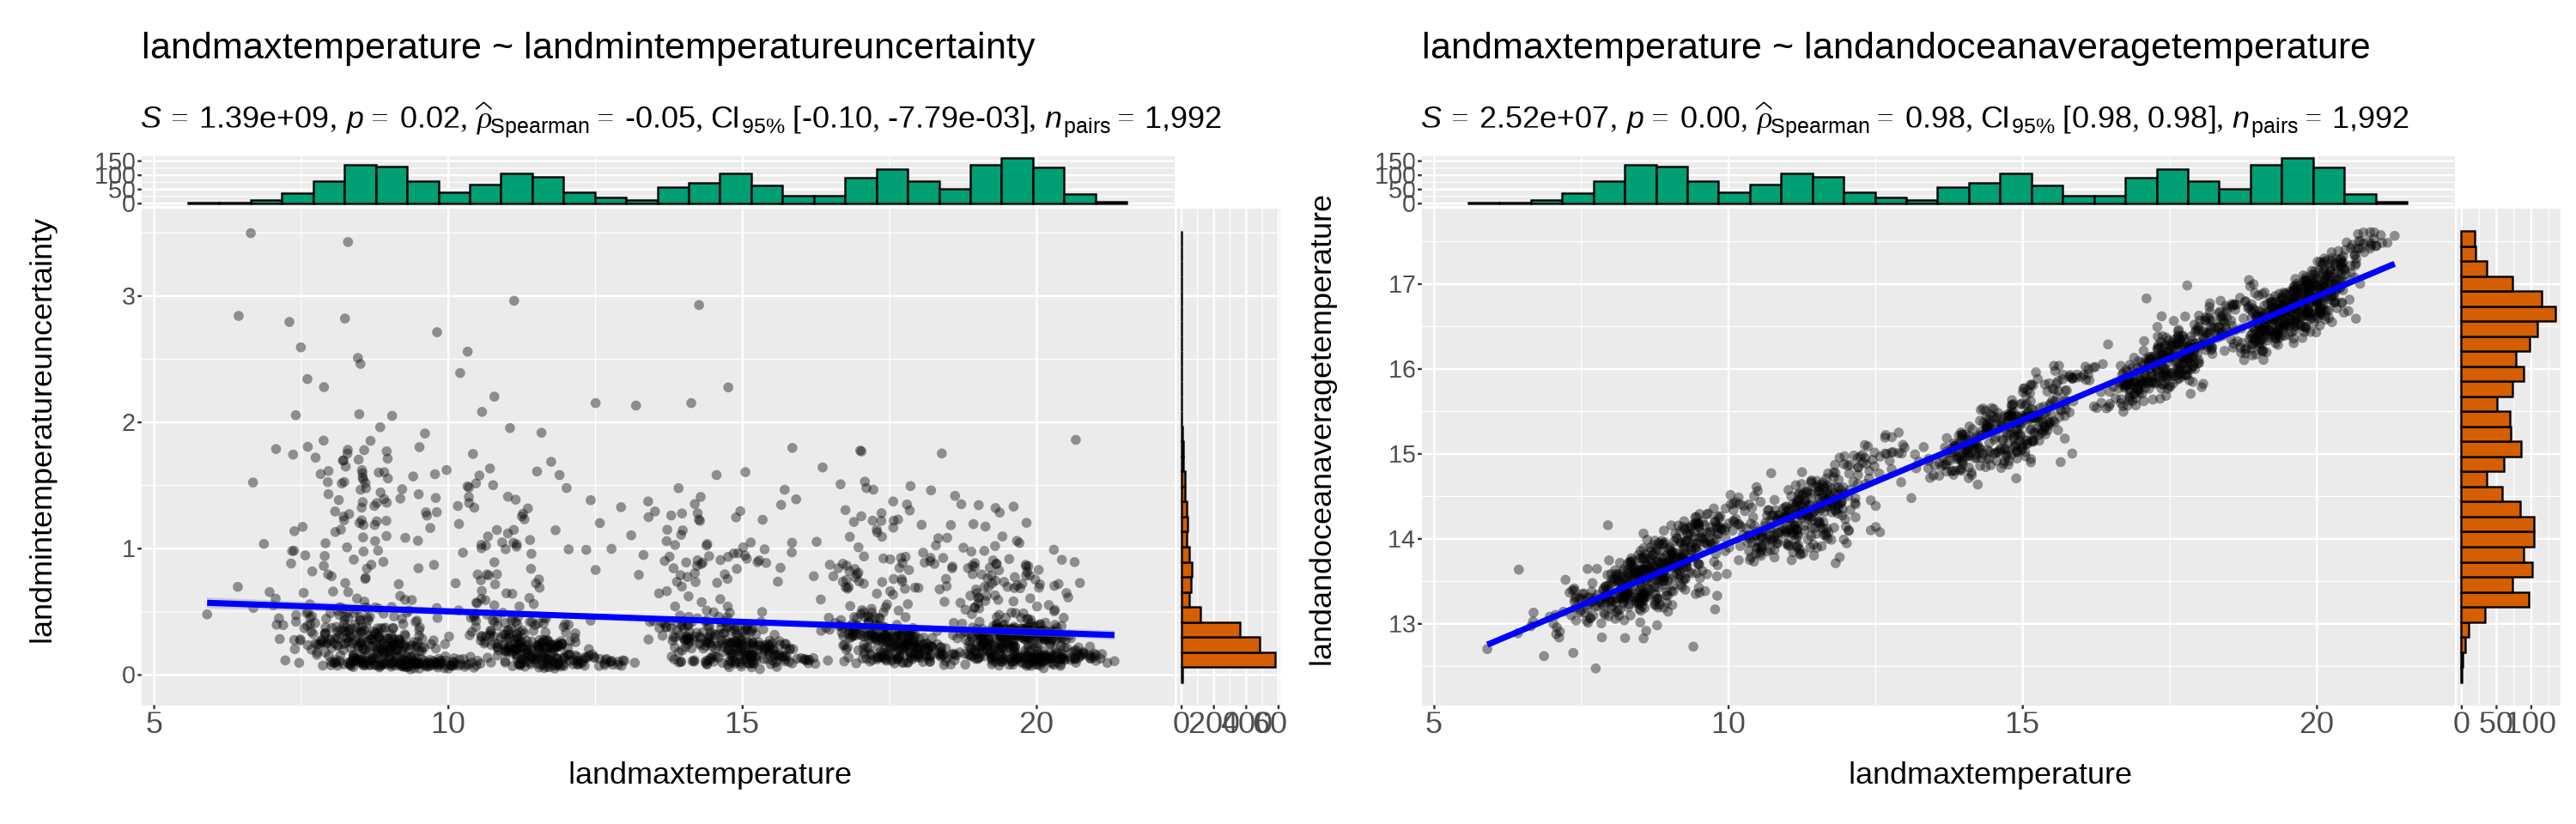

In [101]:
ggscatterstats(data=df,x = landmaxtemperature,y = landmintemperatureuncertainty,type = "np",ggtheme = ggplot2::theme_gray(),title = "landmaxtemperature ~ landmintemperatureuncertainty")+my_thems+
ggscatterstats(data=df,x = landmaxtemperature,y = landandoceanaveragetemperature,type = "np",ggtheme = ggplot2::theme_gray(),title = "landmaxtemperature ~ landandoceanaveragetemperature")+my_thems

> *From the above graphs we can get that :*

> *1. for (landmaxtemperature ~ landmintemperatureuncertainty) :<br>The pvalue is more than 0.05 --> we will reject the null hypothesis that stats there is no significant correlation between the varaibles <br>The spearman value shows that the correlation is very weak 0.05 and it is a Negative correlation*

> *2. for (landmaxtemperature ~landandoceanaveragetemperature) :<br>The pvalue is less than 0.05 --> we will reject the null hypothesis that stats there is no correlation between the varaibles and accept the null hypothesis<br>The spearman value shows that the correlation is very strong 0.98 and it is positive correlation*

---

* *(landmaxtemperature ~ landandoceanaveragetemperatureuncertainty)*

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


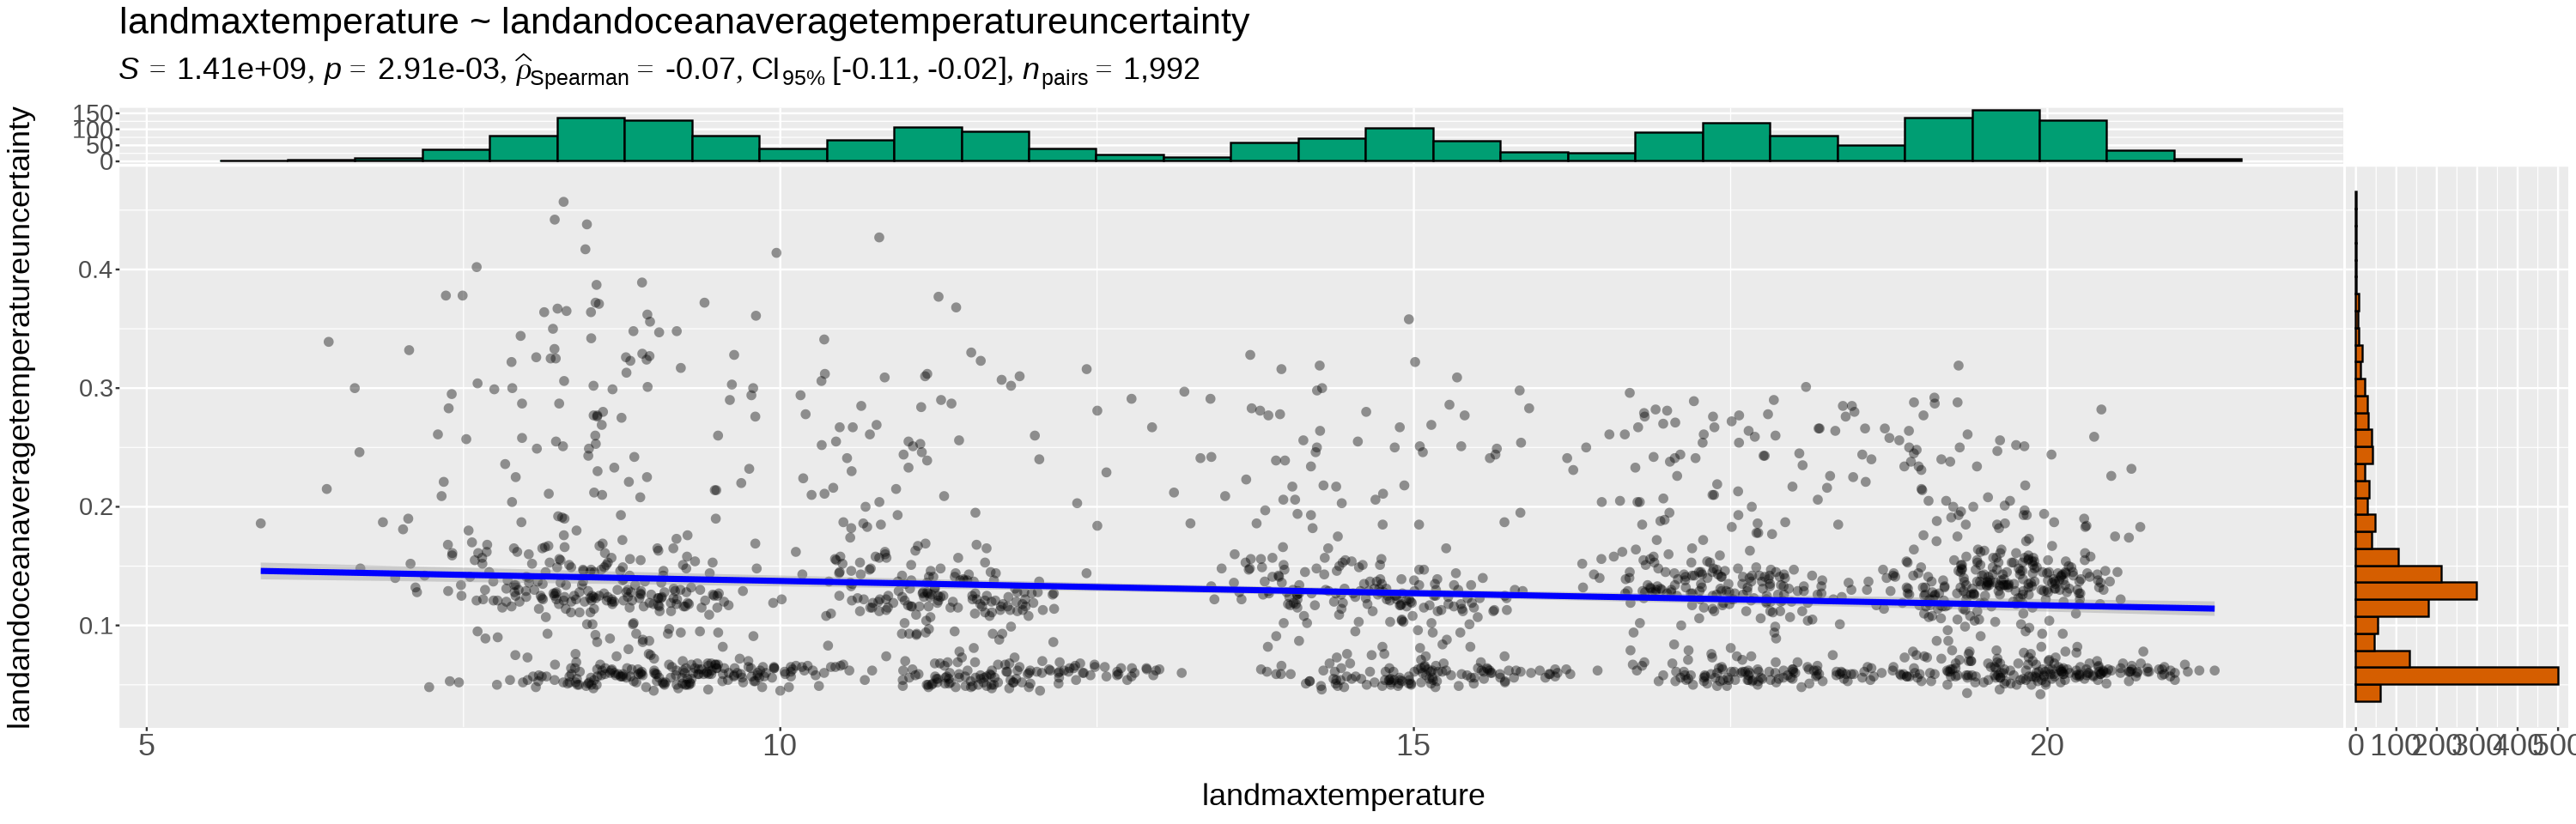

In [100]:
ggscatterstats(data=df,x = landmaxtemperature,y = landandoceanaveragetemperatureuncertainty,type = "np",ggtheme = ggplot2::theme_gray(),title = "landmaxtemperature ~ landandoceanaveragetemperatureuncertainty")+my_thems

> *From the above graphs we can get that :*

> *for (landmaxtemperature ~ landandoceanaveragetemperatureuncertainty) :<br>The pvalue is more than 0.05 --> we will reject the null hypothesis that stats there is no significant correlation between the varaibles <br>The spearman value shows that the correlation is very weak 0.07 and it is a Negative correlation*

---

* *(landmaxtemperatureuncertainty ~ landmintemperature)  &<br>  (landmaxtemperatureuncertainty ~ landmintemperatureuncertainty) &<br> (landmaxtemperatureuncertainty ~ landandoceanaveragetemperature)  &<br>  (landmaxtemperatureuncertainty ~ landandoceanaveragetemperatureuncertainty)*

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


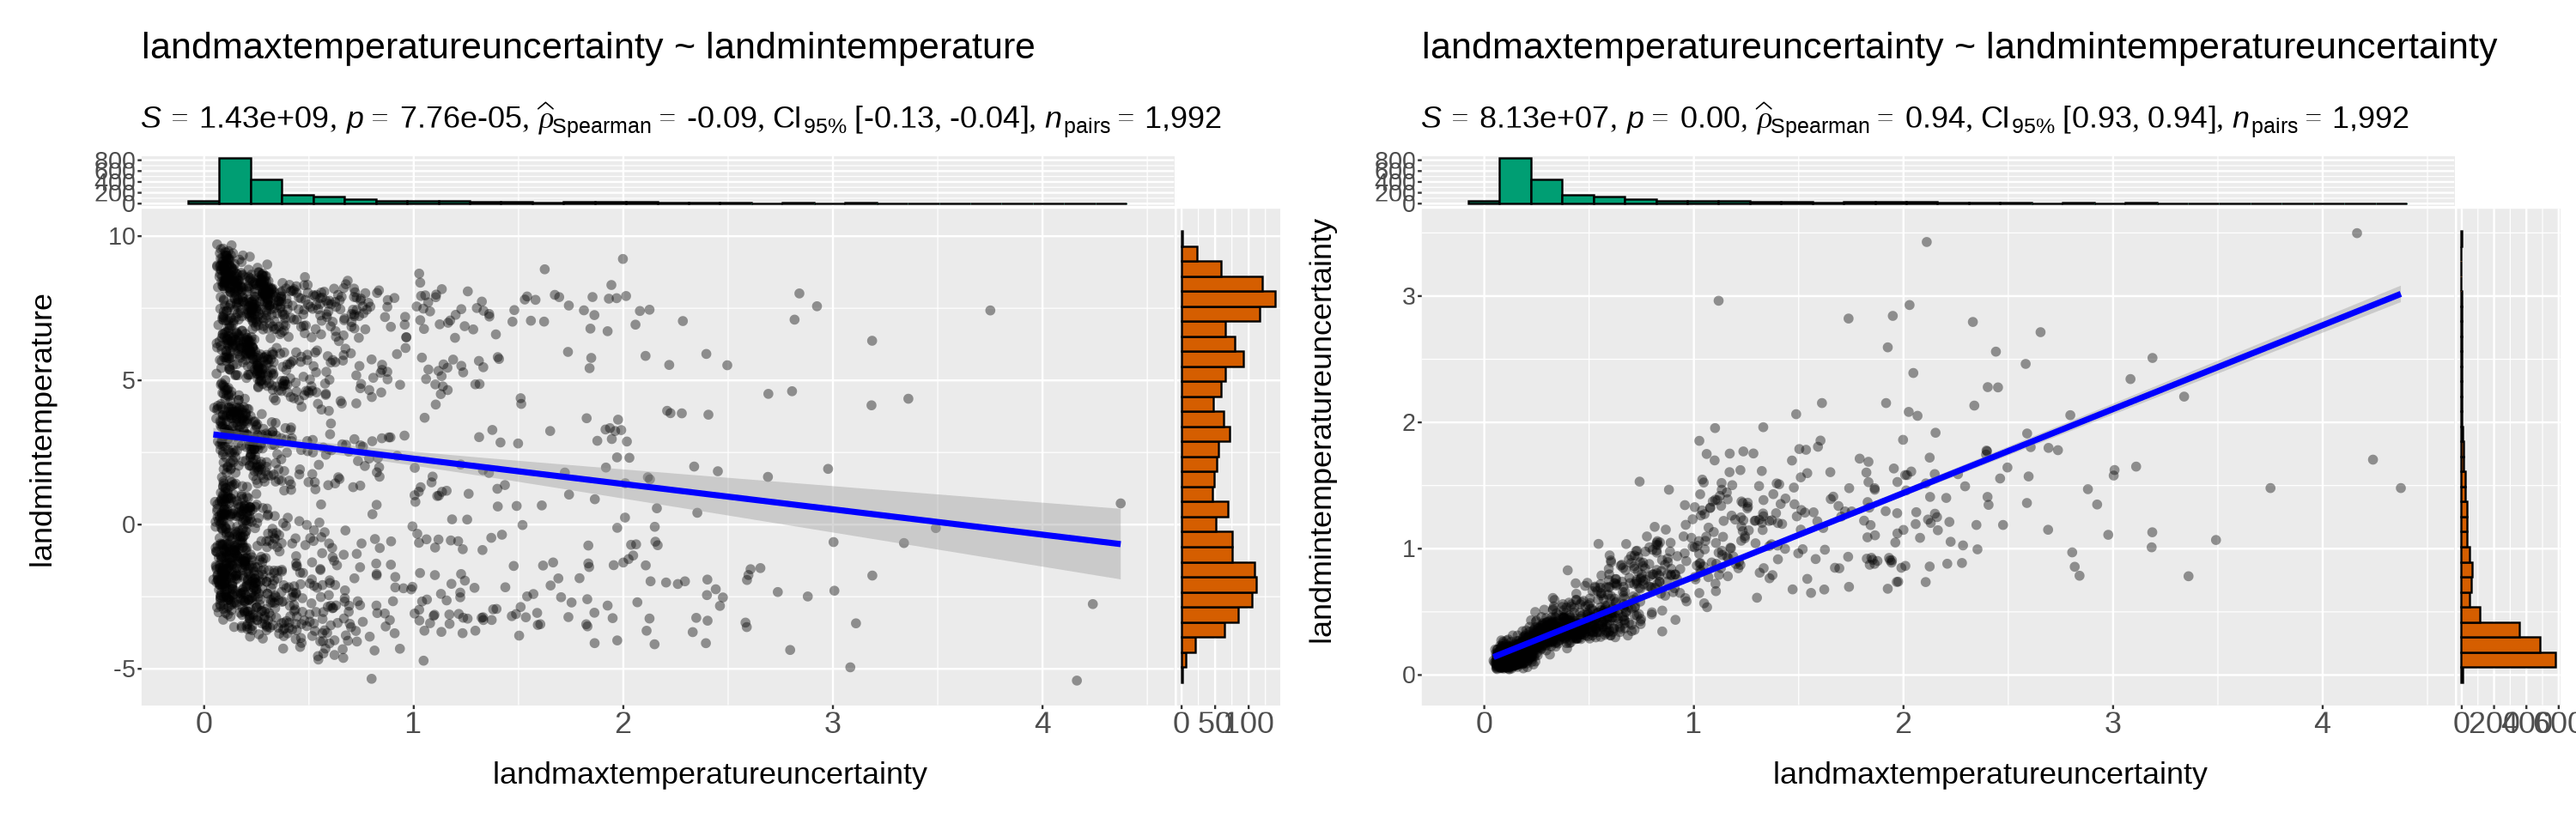

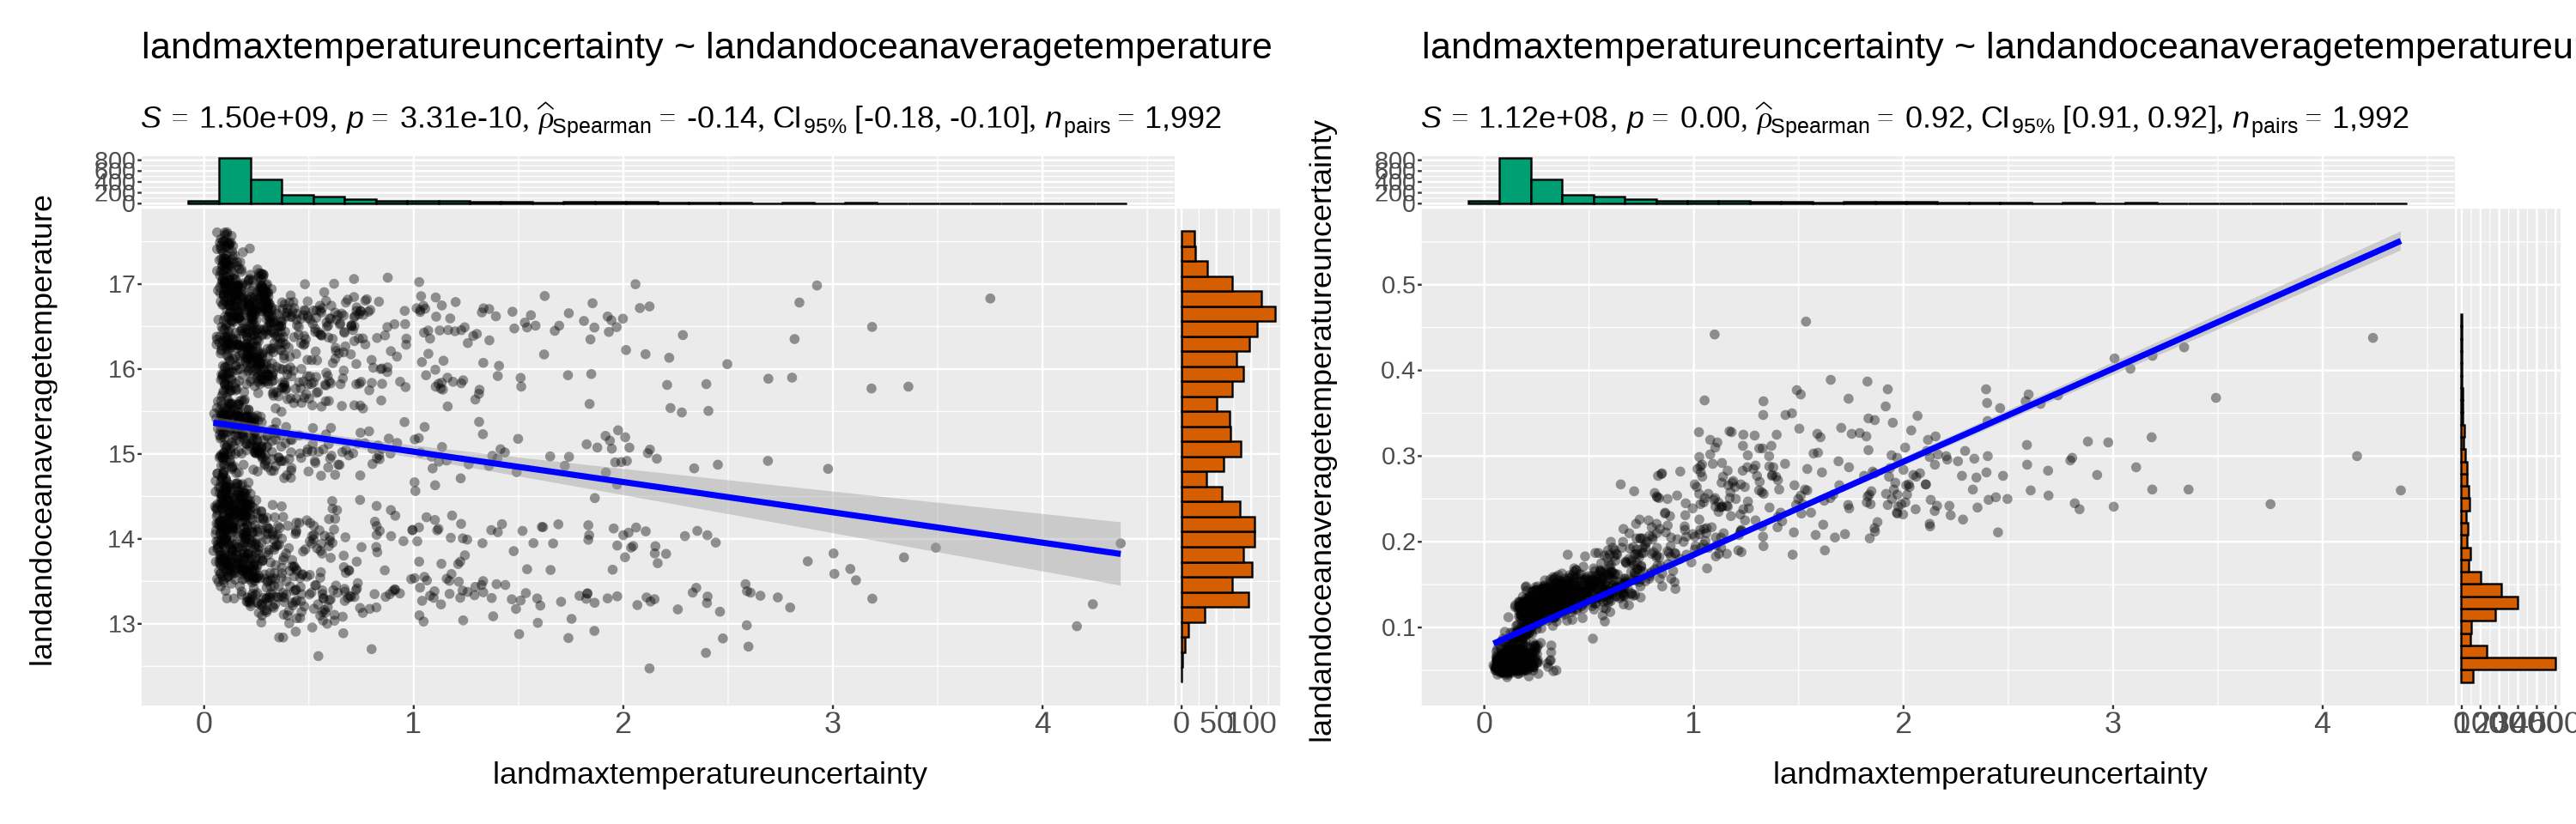

In [99]:
ggscatterstats(data=df,x = landmaxtemperatureuncertainty,y = landmintemperature,type = "np",ggtheme = ggplot2::theme_gray(),title = "landmaxtemperatureuncertainty ~ landmintemperature")+my_thems+
ggscatterstats(data=df,x = landmaxtemperatureuncertainty,y = landmintemperatureuncertainty,type = "np",ggtheme = ggplot2::theme_gray(),title = "landmaxtemperatureuncertainty ~ landmintemperatureuncertainty")+my_thems

ggscatterstats(data=df,x = landmaxtemperatureuncertainty,y = landandoceanaveragetemperature,type = "np",ggtheme = ggplot2::theme_gray(),title = "landmaxtemperatureuncertainty ~ landandoceanaveragetemperature")+my_thems+
ggscatterstats(data=df,x = landmaxtemperatureuncertainty,y = landandoceanaveragetemperatureuncertainty,type = "np",ggtheme = ggplot2::theme_gray(),title = "landmaxtemperatureuncertainty ~ landandoceanaveragetemperatureuncertainty")+my_thems

> *From the above graphs we can get that :*

> *1. for (landmaxtemperatureuncertainty ~ landmintemperature) :<br>The pvalue is more than 0.05 --> we will reject the null hypothesis that stats there is no significant correlation between the varaibles <br>The spearman value shows that the correlation is very weak 0.09 and it is a Negative correlation*

> *2. for (landmaxtemperatureuncertainty ~landmintemperatureuncertainty) :<br>The pvalue is less than 0.05 --> we will reject the null hypothesis that stats there is no correlation between the varaibles and accept the null hypothesis<br>The spearman value shows that the correlation is very strong 0.94 and it is positive correlation*

> *3. for (landmaxtemperatureuncertainty ~landandoceanaveragetemperature) :<br>The pvalue is less than 0.05 --> we will reject the null hypothesis that stats there is no correlation between the varaibles and accept the null hypothesis<br>The spearman value shows that the correlation is very weak 0.14 and it is Negative correlation*

> *4. for (landmaxtemperatureuncertainty ~landandoceanaveragetemperatureuncertainty) :<br>The pvalue is less than 0.05 --> we will reject the null hypothesis that stats there is no correlation between the varaibles and accept the null hypothesis<br>The spearman value shows that the correlation is very strong 0.92 and it is positive correlation*

---

* *(landmintemperature ~ landmintemperatureuncertainty)  &<br>  (landmintemperature ~ landandoceanaveragetemperature) &<br> (landmintemperature ~ landandoceanaveragetemperatureuncertainty)*

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


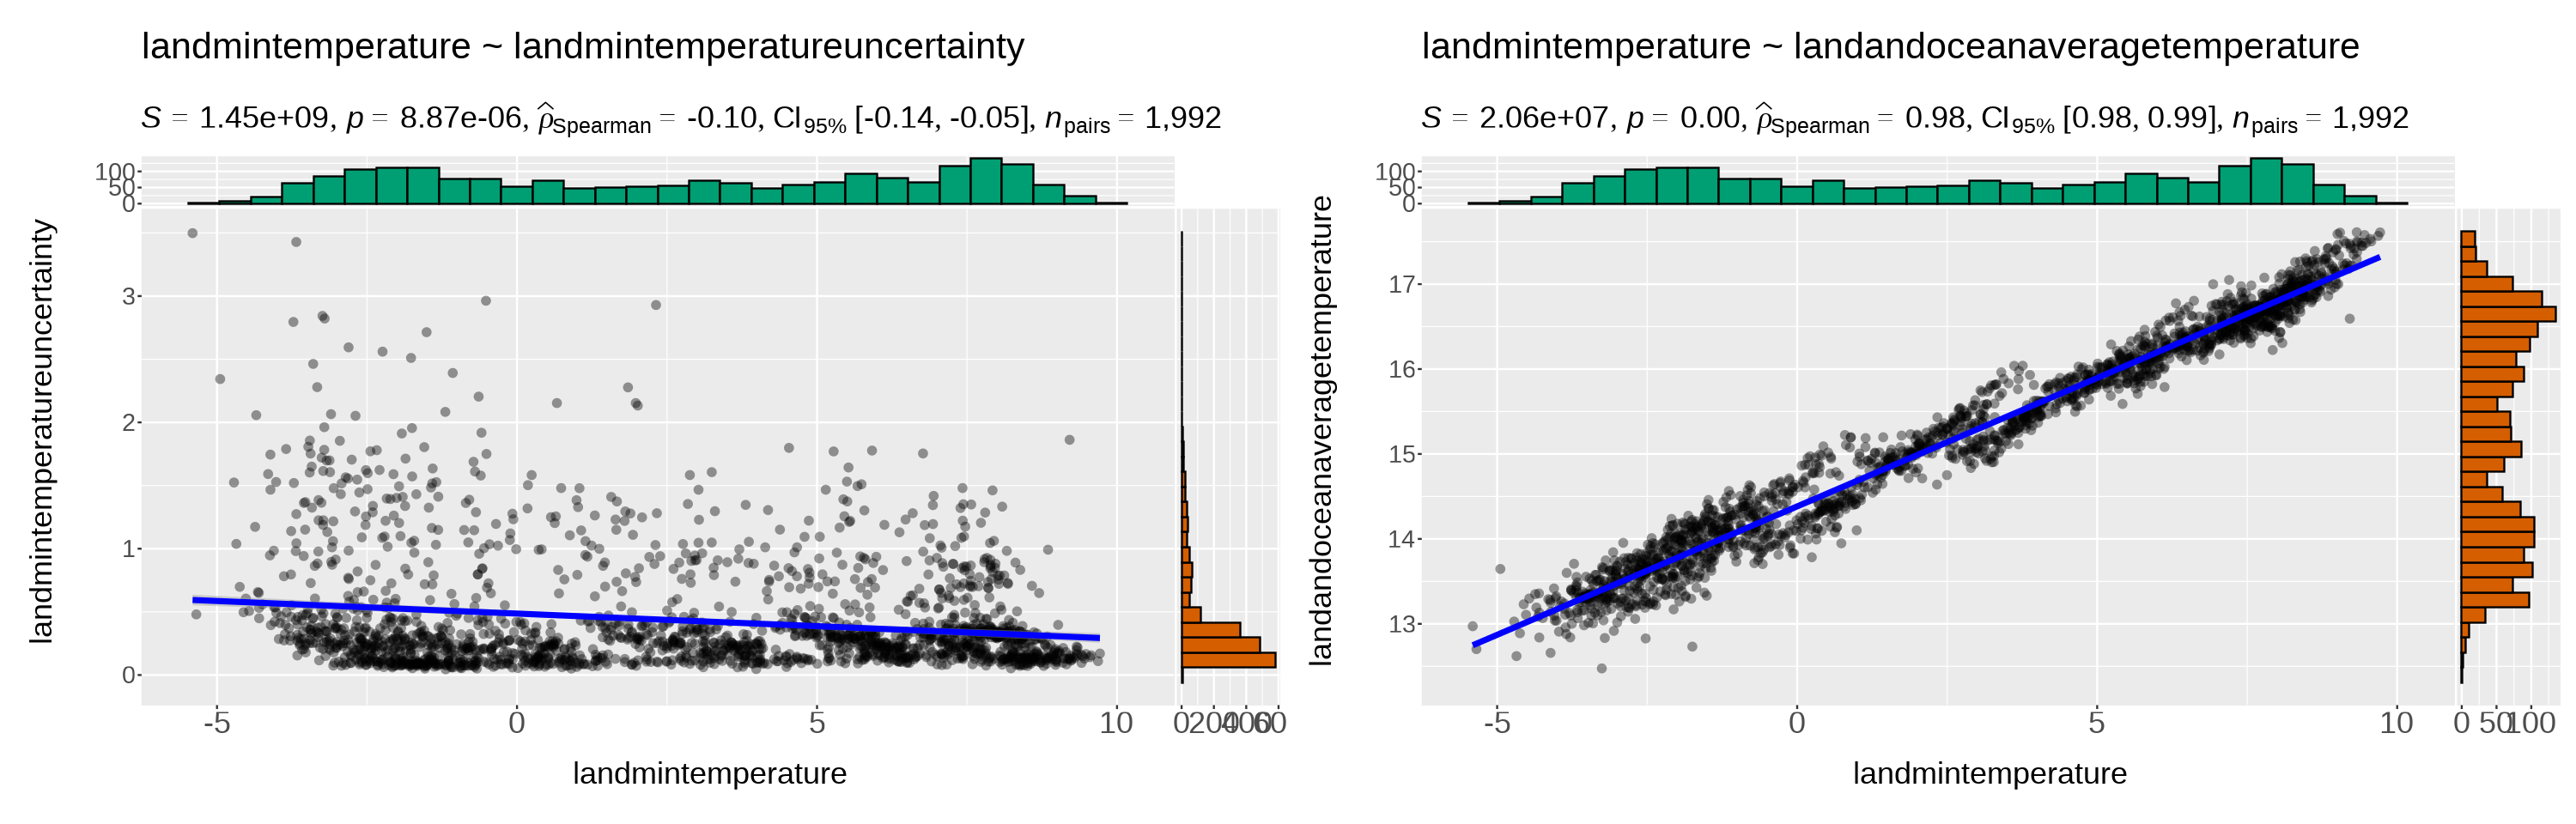

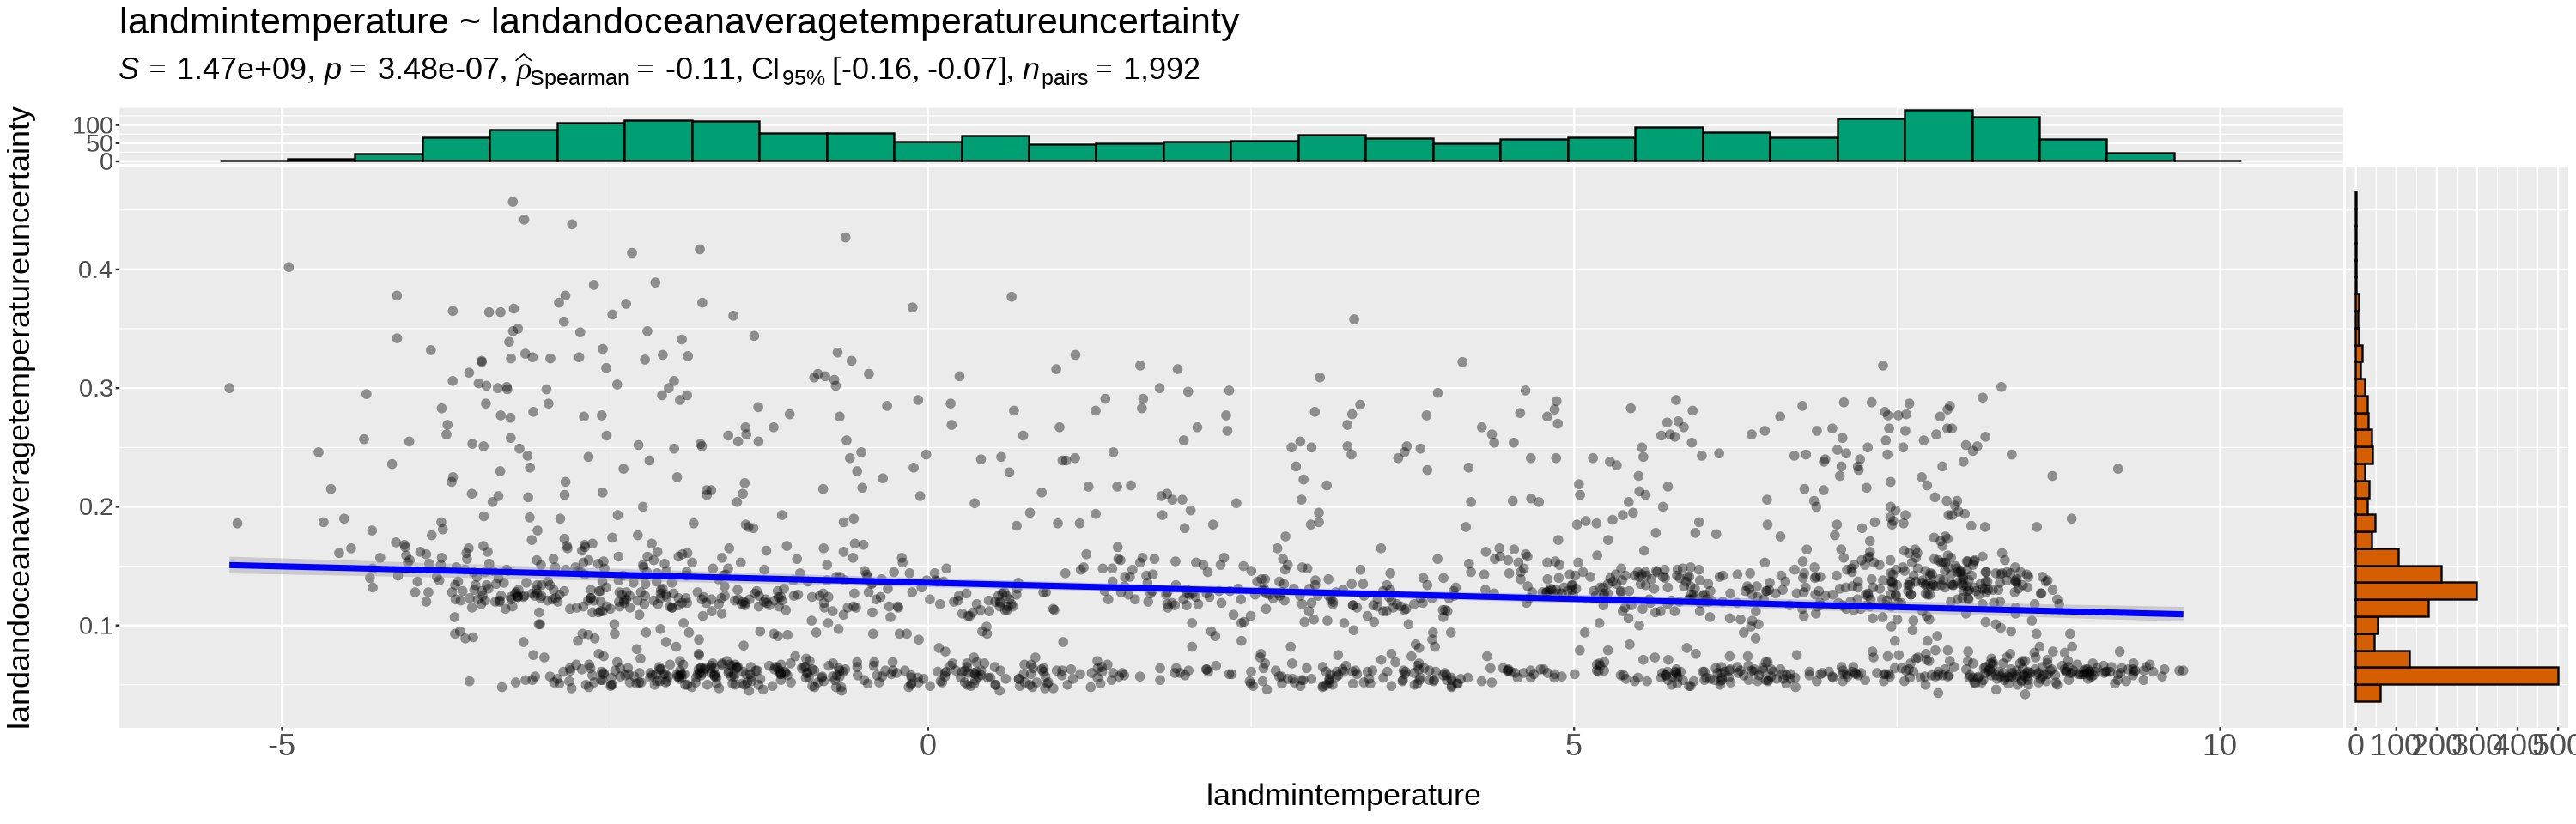

In [98]:
ggscatterstats(data=df,x = landmintemperature,y = landmintemperatureuncertainty,type = "np",ggtheme = ggplot2::theme_gray(),title = "landmintemperature ~ landmintemperatureuncertainty")+my_thems+
ggscatterstats(data=df,x = landmintemperature,y = landandoceanaveragetemperature,type = "np",ggtheme = ggplot2::theme_gray(),title = "landmintemperature ~ landandoceanaveragetemperature")+my_thems
ggscatterstats(data=df,x = landmintemperature,y = landandoceanaveragetemperatureuncertainty,type = "np",ggtheme = ggplot2::theme_gray(),title = "landmintemperature ~ landandoceanaveragetemperatureuncertainty")+my_thems

> *From the above graphs we can get that :*

> *1. for (landmintemperature ~ landmintemperatureuncertainty) :<br>The pvalue is more than 0.05 --> we will reject the null hypothesis that stats there is no significant correlation between the varaibles <br>The spearman value shows that the correlation is very weak 0.10 and it is a Negative correlation*

> *2. for (landmintemperature ~landandoceanaveragetemperature) :<br>The pvalue is less than 0.05 --> we will reject the null hypothesis that stats there is no correlation between the varaibles and accept the null hypothesis<br>The spearman value shows that the correlation is very strong 0.98 and it is positive correlation*

> *3. for (landmintemperature ~landandoceanaveragetemperatureuncertainty) :<br>The pvalue is less than 0.05 --> we will reject the null hypothesis that stats there is no correlation between the varaibles and accept the null hypothesis<br>The spearman value shows that the correlation is very weak 0.11 and it is Negative correlation*

---

* *(landmintemperatureuncertainty ~ landandoceanaveragetemperature)  &<br>  (landmintemperatureuncertainty ~ landandoceanaveragetemperatureuncertainty) &<br> (landmintemperatureuncertainty ~ landandoceanaveragetemperatureuncertainty)*

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


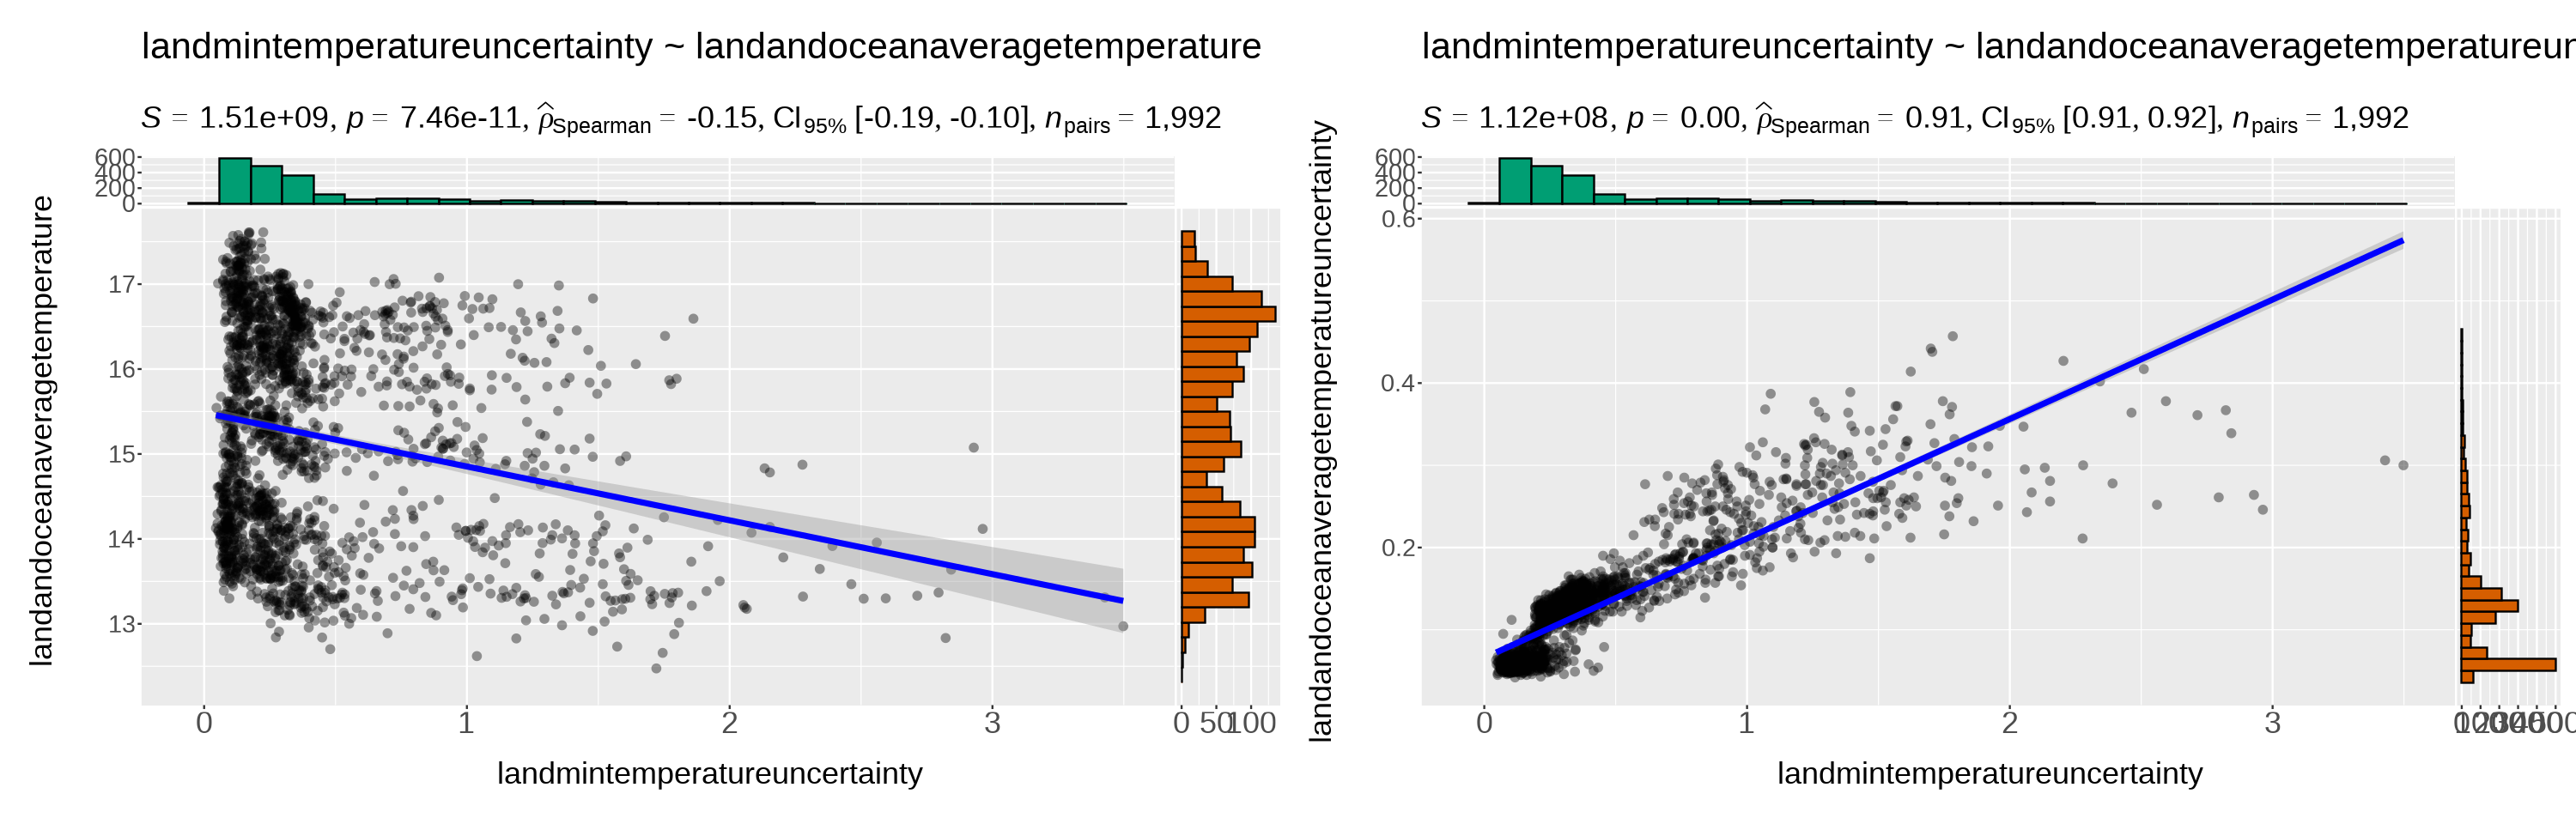

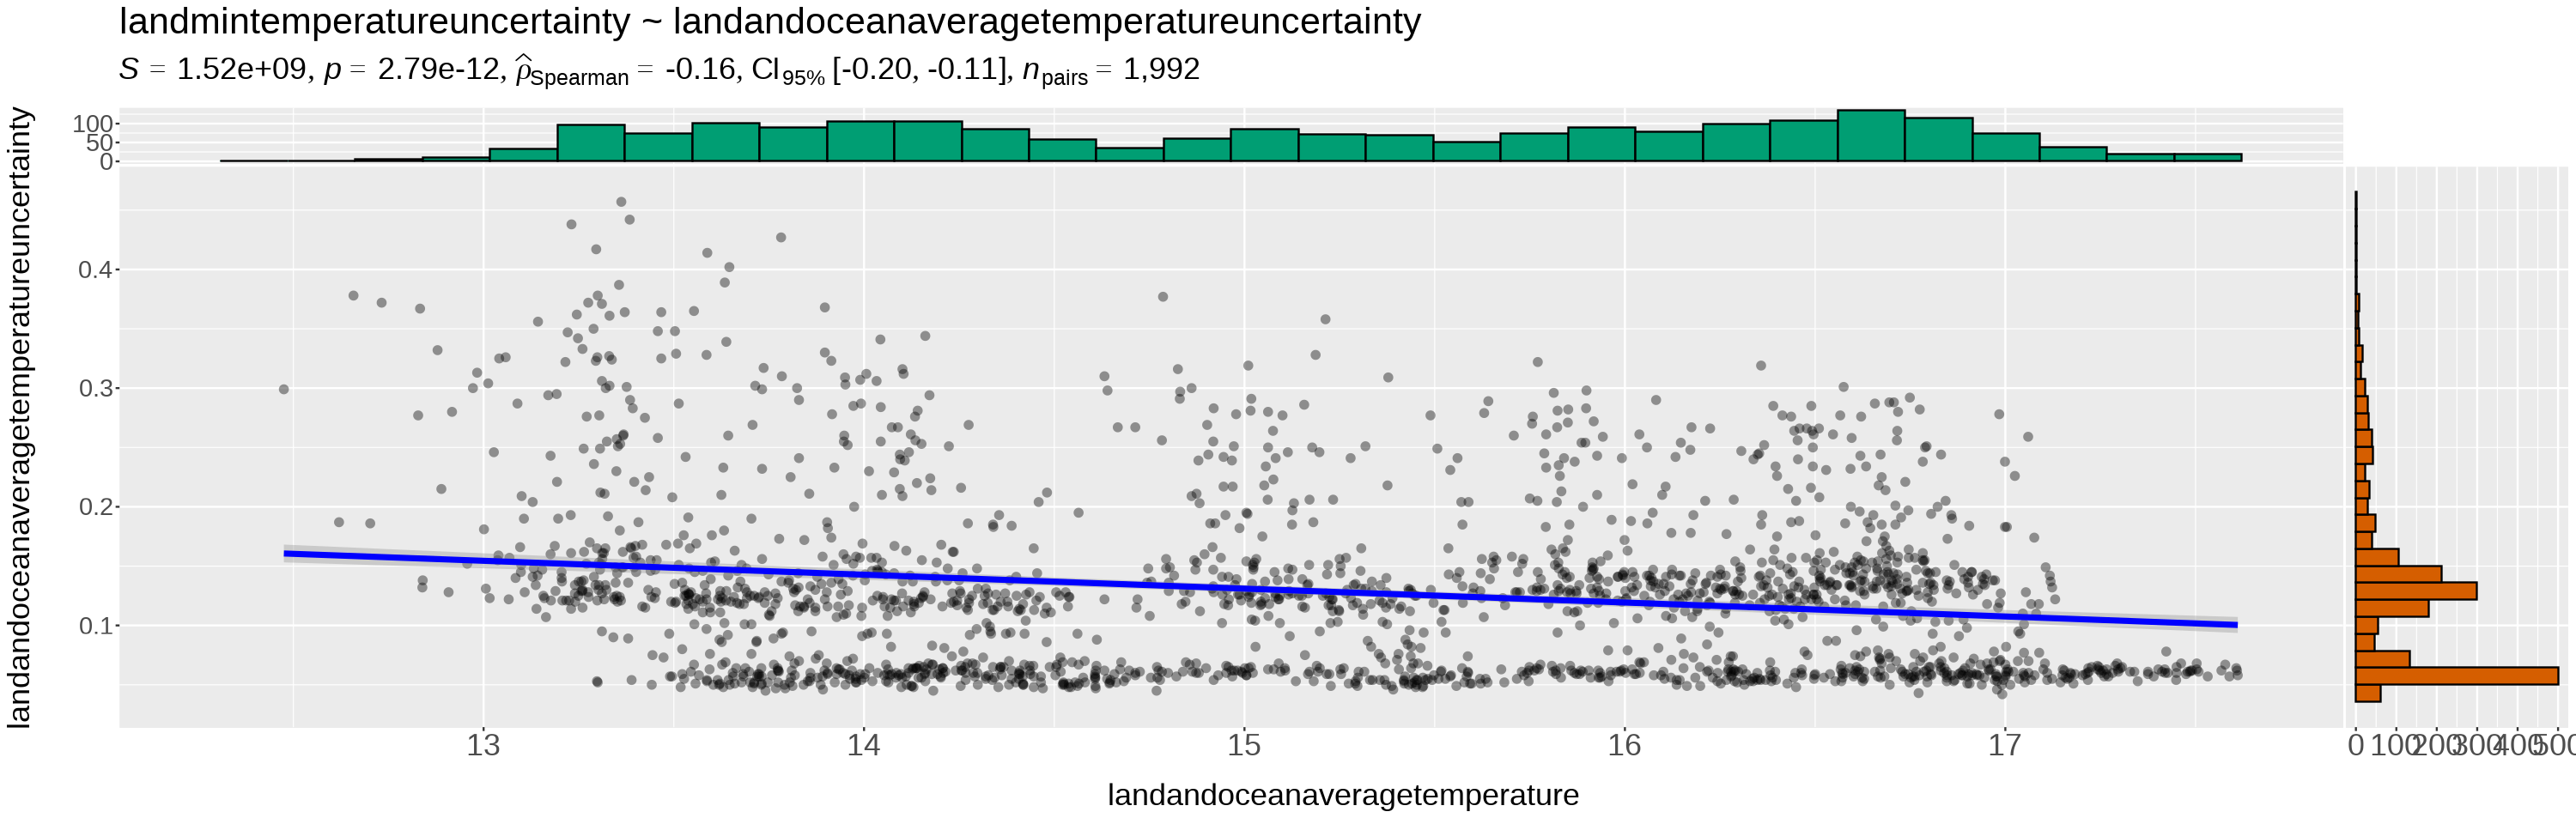

In [97]:
ggscatterstats(data=df,x = landmintemperatureuncertainty,y = landandoceanaveragetemperature,type = "np",ggtheme = ggplot2::theme_gray(),title = "landmintemperatureuncertainty ~ landandoceanaveragetemperature")+my_thems+
ggscatterstats(data=df,x = landmintemperatureuncertainty,y = landandoceanaveragetemperatureuncertainty,type = "np",ggtheme = ggplot2::theme_gray(),title = "landmintemperatureuncertainty ~ landandoceanaveragetemperatureuncertainty")+my_thems

ggscatterstats(data=df,x = landandoceanaveragetemperature,y = landandoceanaveragetemperatureuncertainty,type = "np",ggtheme = ggplot2::theme_gray(),title = "landmintemperatureuncertainty ~ landandoceanaveragetemperatureuncertainty")+my_thems

> *From the above graphs we can get that :*

> *1. for (landmintemperatureuncertainty ~ landandoceanaveragetemperature) :<br>The pvalue is more than 0.05 --> we will reject the null hypothesis that stats there is no significant correlation between the varaibles <br>The spearman value shows that the correlation is very weak 0.15 and it is a Negative correlation*

> *2. for (landmintemperatureuncertainty ~landandoceanaveragetemperatureuncertainty) :<br>The pvalue is less than 0.05 --> we will reject the null hypothesis that stats there is no correlation between the varaibles and accept the null hypothesis<br>The spearman value shows that the correlation is very strong 0.91 and it is positive correlation*

> *3. for (landandoceanaveragetemperature ~landandoceanaveragetemperatureuncertainty) :<br>The pvalue is less than 0.05 --> we will reject the null hypothesis that stats there is no correlation between the varaibles and accept the null hypothesis<br>The spearman value shows that the correlation is very weak 0.16 and it is Negative correlation*

---